## Create study area plot

/Users/milliespencer/miniconda3/envs/oggm_cr2_env/lib/python3.11/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/milliespencer/miniconda3/envs/oggm_cr2_env/lib/python3.11/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/milliespencer/miniconda3/envs/oggm_cr2_env/lib/python3.11/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/milliespencer/miniconda3/envs/oggm_cr2_env/lib/python3.11/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_bou

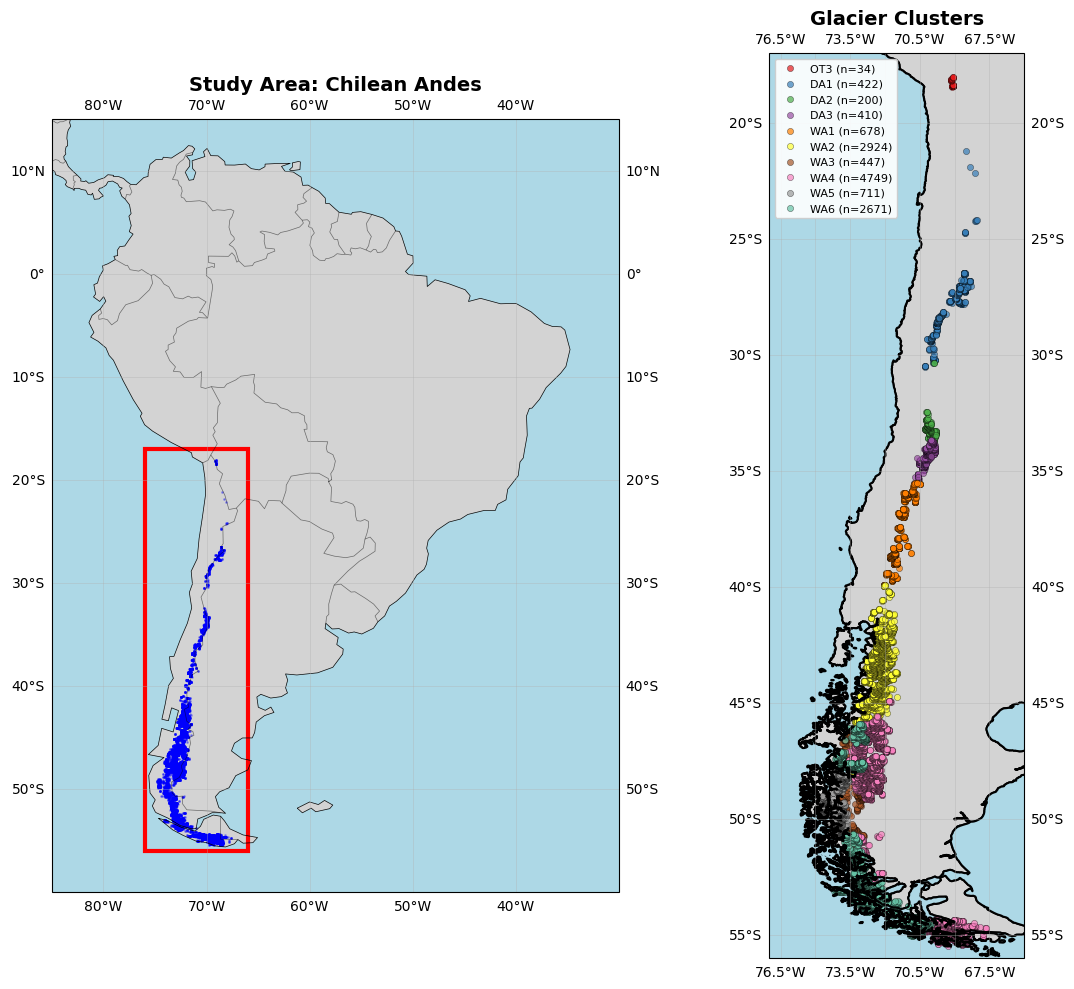

✓ Map saved to: Study_Area_Map.png


In [1]:
"""
Create study area map showing glacier clusters in Chile
"""

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load your cluster data
datos_rgi = pd.read_csv('/Users/milliespencer/Desktop/CR2_OGGM_Paper/files_chile_OGGM_climate_comparison/RGI_BNA_Clusters.csv')

# Create GeoDataFrame from your RGI data (assuming it has lat/lon columns)
# If your CSV has CenLat and CenLon:
gdf = gpd.GeoDataFrame(
    datos_rgi,
    geometry=gpd.points_from_xy(datos_rgi.CenLon, datos_rgi.CenLat),
    crs='EPSG:4326'
)

# Define cluster colors
cluster_colors = {
    'OT3': '#e41a1c',
    'DA1': '#377eb8',
    'DA2': '#4daf4a',
    'DA3': '#984ea3',
    'WA1': '#ff7f00',
    'WA2': '#ffff33',
    'WA3': '#a65628',
    'WA4': '#f781bf',
    'WA5': '#999999',
    'WA6': '#66c2a5'
}

# Create figure with two panels
fig = plt.figure(figsize=(12, 10))

# PANEL 1: South America context map
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.set_extent([-85, -30, -60, 15], crs=ccrs.PlateCarree())

# Add features
ax1.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='none')
ax1.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax1.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax1.add_feature(cfeature.BORDERS, linewidth=0.5, alpha=0.5)

# Highlight Chile
chile_bounds = [-76, -66, -56, -17]  # lon_min, lon_max, lat_min, lat_max
ax1.add_patch(Rectangle(
    xy=(chile_bounds[0], chile_bounds[2]),
    width=chile_bounds[1] - chile_bounds[0],
    height=chile_bounds[3] - chile_bounds[2],
    facecolor='none',
    edgecolor='red',
    linewidth=3,
    transform=ccrs.PlateCarree()
))

# Add all glaciers as small dots
ax1.scatter(gdf.CenLon, gdf.CenLat, s=1, c='blue', alpha=0.3, 
           transform=ccrs.PlateCarree(), label='Glaciers')

ax1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax1.set_title('Study Area: Chilean Andes', fontsize=14, fontweight='bold')

# PANEL 2: Chile detail with clusters
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.set_extent([-77, -66, -56, -17], crs=ccrs.PlateCarree())

# Add features
ax2.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black', linewidth=1.5)
ax2.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax2.add_feature(cfeature.COASTLINE, linewidth=1.5, edgecolor='black')

# Plot each cluster with different colors
for cluster_name, color in cluster_colors.items():
    cluster_data = gdf[gdf['Cluster'] == cluster_name]
    if len(cluster_data) > 0:
        ax2.scatter(cluster_data.CenLon, cluster_data.CenLat, 
                   s=20, c=color, alpha=0.7, 
                   transform=ccrs.PlateCarree(),
                   label=f'{cluster_name} (n={len(cluster_data)})',
                   edgecolors='black', linewidths=0.3)

ax2.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax2.set_title('Glacier Clusters', fontsize=14, fontweight='bold')
ax2.legend(loc='upper left', fontsize=8, framealpha=0.9)

plt.tight_layout()
plt.savefig('/Users/milliespencer/Desktop/CR2_OGGM_Paper/Study_Area_Map.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("✓ Map saved to: Study_Area_Map.png")

Model run comparison for DA1


MULTI-DATASET COMPARISON - DA1 CLUSTER

Geodetic Mass Balance (GMB): -98.7 ± 152.6 mm w.e./yr

Simulated Mass Balance by Dataset (area-weighted means ± glacier spread):
  CR2MET: -118.4 ± 117.5 mm/yr (422 glaciers)
  ERA5:   -95.0 ± 112.6 mm/yr (421 glaciers)
  CRU:    -96.1 ± 112.5 mm/yr (421 glaciers)

Uncertainty Components:
  Within-dataset (glacier variability): ±114.2 mm/yr (avg)
  Between-dataset (climate forcing):    ±13.2 mm/yr

Ensemble: -103.2 ± 13.2 mm/yr (climate forcing uncertainty)



/var/folders/3j/6dy_9gxj7vvgct178jkkp1680000gn/T/ipykernel_45624/2691503135.py:154: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(box_data, labels=datasets_short,


✓ Saved: Multi_Dataset_Comparison_Points_DA1.png
✓ Saved: Multi_Dataset_Comparison_Publication_DA1.png


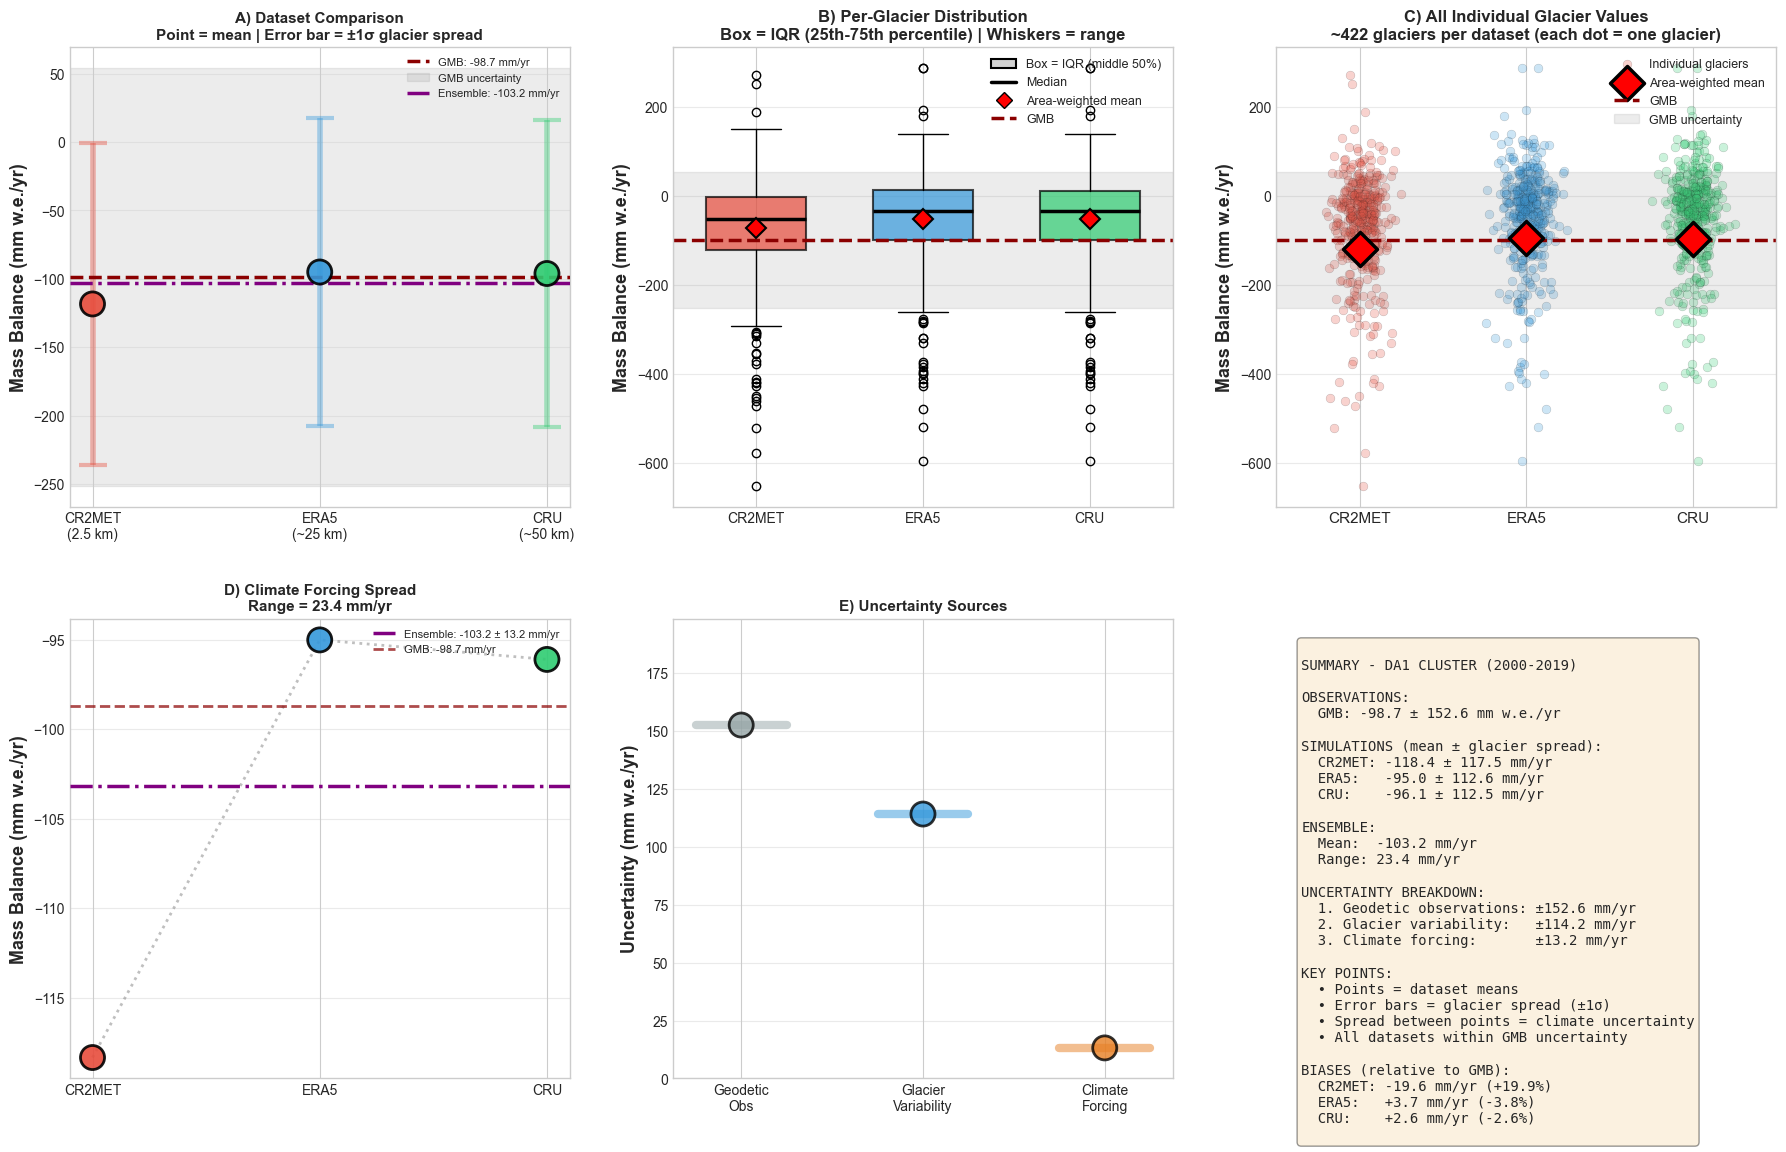

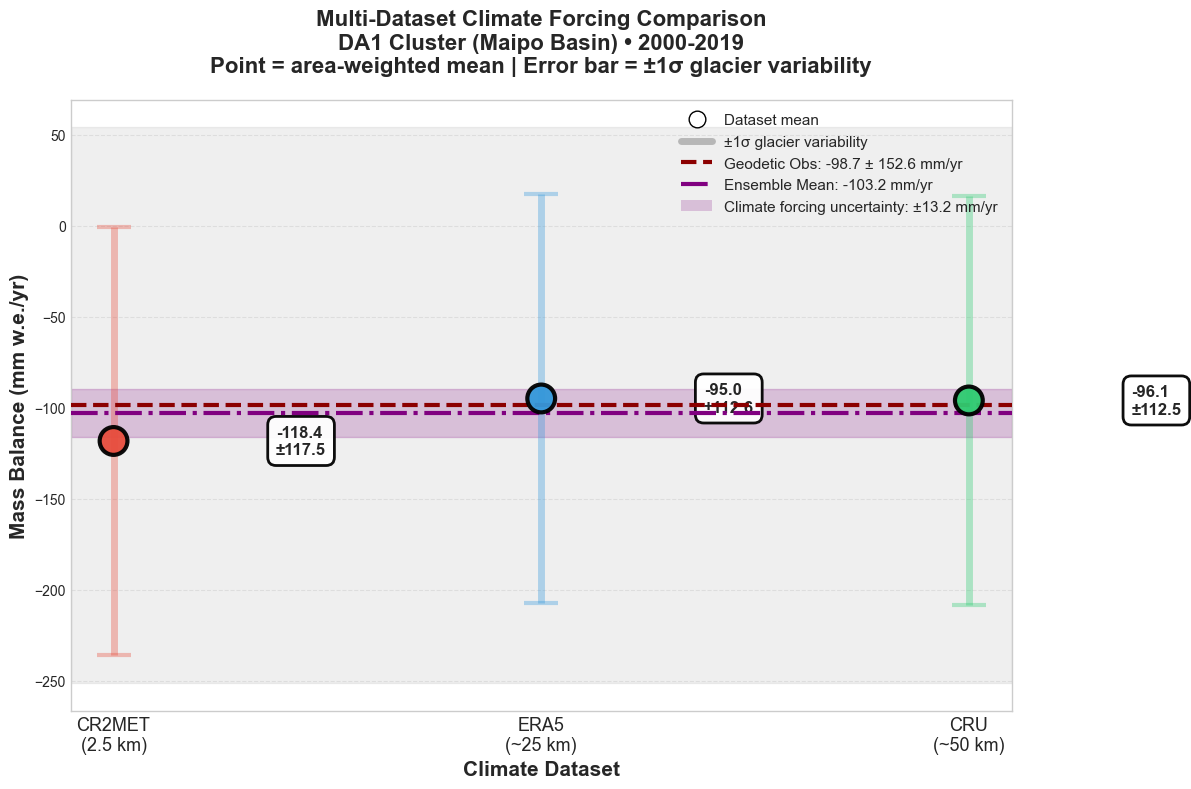


POINT-BASED COMPARISON PLOTS CREATED!

Output files:
  1. Multi_Dataset_Comparison_Points_DA1.png (6-panel detailed)
  2. Multi_Dataset_Comparison_Publication_DA1.png (clean publication)

Visualization:
  • Large dots = dataset mean (area-weighted)
  • Error bars = ±1σ glacier-to-glacier variability
  • Spread between dots = climate forcing uncertainty

Location: /Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/



In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Enhanced Multi-Dataset Climate Comparison for DA1 Cluster
Using point + error bar visualization (NOT bar charts)
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

##############################################################################
# Helper function to read comparison CSV files
##############################################################################

def read_comparison_csv(filepath):
    """Read comparison CSV and extract values as dictionary"""
    df = pd.read_csv(filepath, header=None)
    data_dict = {}
    for idx, row in df.iterrows():
        if idx == 0:  # Skip header row
            continue
        try:
            # Format is: value, label
            data_dict[row[1]] = float(row[0])
        except (ValueError, TypeError):
            pass  # Skip any non-numeric values
    return data_dict

##############################################################################
# Load mean values from comparison files
##############################################################################

cr2_data = read_comparison_csv('/Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/CR2MET/DA1/comparacion_gmb_smb_DA1_.csv')
era5_data = read_comparison_csv('/Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/ERA5/DA1/comparacion_gmb_smb_DA1_.csv')
cru_data = read_comparison_csv('/Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/CRU/DA1/comparacion_gmb_smb_DA1_.csv')

# Extract mean values
gmb_value = cr2_data['GMB']
gmb_error = cr2_data['GMB_error']

cr2_smb_mean = cr2_data['SMB']
era5_smb_mean = era5_data['SMB']
cru_smb_mean = cru_data['SMB']

cr2_n = cr2_data['n_g_oggm']
era5_n = era5_data['n_g_oggm']
cru_n = cru_data['n_g_oggm']

##############################################################################
# Load per-glacier mass balance data to calculate variability
##############################################################################

# Load per-glacier MB timeseries
cr2_mb = pd.read_csv('/Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/CR2MET/DA1/mb.csv')
era5_mb = pd.read_csv('/Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/ERA5/DA1/mb.csv')
cru_mb = pd.read_csv('/Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/CRU/DA1/mb.csv')

# Extract only numeric columns (skip RGI ID column)
# Find the first column that's all numeric (years)
cr2_numeric = cr2_mb.select_dtypes(include=[np.number])
era5_numeric = era5_mb.select_dtypes(include=[np.number])
cru_numeric = cru_mb.select_dtypes(include=[np.number])

# Calculate mean MB across all years for each glacier, then get std dev across glaciers
cr2_glacier_means = cr2_numeric.mean(axis=1)  # Mean across years for each glacier
era5_glacier_means = era5_numeric.mean(axis=1)
cru_glacier_means = cru_numeric.mean(axis=1)

cr2_smb_std = cr2_glacier_means.std()  # Std dev across glaciers
era5_smb_std = era5_glacier_means.std()
cru_smb_std = cru_glacier_means.std()

##############################################################################
# Calculate multi-dataset statistics
##############################################################################

smb_means = np.array([cr2_smb_mean, era5_smb_mean, cru_smb_mean])
ensemble_mean = np.mean(smb_means)
climate_uncertainty = np.std(smb_means, ddof=1)  # Inter-dataset uncertainty
smb_range = np.max(smb_means) - np.min(smb_means)

print("\n" + "="*70)
print("MULTI-DATASET COMPARISON - DA1 CLUSTER")
print("="*70)
print(f"\nGeodetic Mass Balance (GMB): {gmb_value:.1f} ± {gmb_error:.1f} mm w.e./yr")
print(f"\nSimulated Mass Balance by Dataset (area-weighted means ± glacier spread):")
print(f"  CR2MET: {cr2_smb_mean:.1f} ± {cr2_smb_std:.1f} mm/yr ({cr2_n:.0f} glaciers)")
print(f"  ERA5:   {era5_smb_mean:.1f} ± {era5_smb_std:.1f} mm/yr ({era5_n:.0f} glaciers)")
print(f"  CRU:    {cru_smb_mean:.1f} ± {cru_smb_std:.1f} mm/yr ({cru_n:.0f} glaciers)")
print(f"\nUncertainty Components:")
print(f"  Within-dataset (glacier variability): ±{np.mean([cr2_smb_std, era5_smb_std, cru_smb_std]):.1f} mm/yr (avg)")
print(f"  Between-dataset (climate forcing):    ±{climate_uncertainty:.1f} mm/yr")
print(f"\nEnsemble: {ensemble_mean:.1f} ± {climate_uncertainty:.1f} mm/yr (climate forcing uncertainty)")
print("="*70 + "\n")

##############################################################################
# Create proper point + error bar plots
##############################################################################

fig = plt.figure(figsize=(18, 12))

datasets_short = ['CR2MET', 'ERA5', 'CRU']
datasets_full = ['CR2MET\n(2.5 km)', 'ERA5\n(~25 km)', 'CRU\n(~50 km)']
smb_vals = [cr2_smb_mean, era5_smb_mean, cru_smb_mean]
smb_stds = [cr2_smb_std, era5_smb_std, cru_smb_std]
colors = ['#e74c3c', '#3498db', '#2ecc71']

# --------------------------------------------------
# PLOT 1: Point + Error Bar (glacier variability)
# --------------------------------------------------
ax1 = plt.subplot(2, 3, 1)

x_pos = np.arange(len(datasets_short))

# Plot error bars first (glacier spread)
for i, (x, mean, std, color) in enumerate(zip(x_pos, smb_vals, smb_stds, colors)):
    ax1.errorbar(x, mean, yerr=std, fmt='none', capsize=10, capthick=3,
                color=color, alpha=0.4, linewidth=4, zorder=1)

# Plot mean points on top
ax1.scatter(x_pos, smb_vals, s=300, c=colors, edgecolor='black', 
           linewidth=2, zorder=10, marker='o', alpha=0.9)

# Add GMB reference
ax1.axhline(y=gmb_value, color='darkred', linestyle='--', linewidth=2.5, 
           label=f'GMB: {gmb_value:.1f} mm/yr', zorder=5)
ax1.axhspan(gmb_value - gmb_error, gmb_value + gmb_error, alpha=0.15, color='gray',
           label='GMB uncertainty', zorder=0)

# Add ensemble mean
ax1.axhline(y=ensemble_mean, color='purple', linestyle='-.', linewidth=2.5, 
           label=f'Ensemble: {ensemble_mean:.1f} mm/yr', zorder=5)

ax1.set_ylabel('Mass Balance (mm w.e./yr)', fontsize=13, fontweight='bold')
ax1.set_title('A) Dataset Comparison\nPoint = mean | Error bar = ±1σ glacier spread',
             fontsize=11, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(datasets_full, fontsize=10)
ax1.legend(loc='upper right', fontsize=8, framealpha=0.95)
ax1.grid(axis='y', alpha=0.4)

# --------------------------------------------------
# PLOT 2: Box Plot (full distribution)
# --------------------------------------------------
ax2 = plt.subplot(2, 3, 2)

box_data = [cr2_glacier_means.values, era5_glacier_means.values, cru_glacier_means.values]
bp = ax2.boxplot(box_data, labels=datasets_short, 
                 patch_artist=True, showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='red', markersize=10, 
                              markeredgecolor='black', markeredgewidth=1.5, label='Area-weighted mean'),
                 medianprops=dict(color='black', linewidth=2.5, label='Median'),
                 widths=0.6)

# Color the boxes
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

# Add GMB reference
gmb_line = ax2.axhline(y=gmb_value, color='darkred', linestyle='--', linewidth=2.5, label='GMB')
ax2.axhspan(gmb_value - gmb_error, gmb_value + gmb_error, alpha=0.15, color='gray')

ax2.set_ylabel('Mass Balance (mm w.e./yr)', fontsize=13, fontweight='bold')
ax2.set_title('B) Per-Glacier Distribution\n' + 
             'Box = IQR (25th-75th percentile) | Whiskers = range',
             fontsize=12, fontweight='bold')

# Create custom legend handles for box plot elements
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
box_legend = [
    Patch(facecolor='lightgray', edgecolor='black', linewidth=1.5, label='Box = IQR (middle 50%)'),
    Line2D([0], [0], color='black', linewidth=2.5, label='Median'),
    Line2D([0], [0], marker='D', color='w', markerfacecolor='red', 
           markeredgecolor='black', markersize=8, linewidth=0, label='Area-weighted mean'),
    Line2D([0], [0], color='darkred', linestyle='--', linewidth=2.5, label='GMB'),
]
ax2.legend(handles=box_legend, loc='upper right', fontsize=9)
ax2.grid(axis='y', alpha=0.4)

# --------------------------------------------------
# PLOT 3: Scatter with all individual glaciers
# --------------------------------------------------
ax3 = plt.subplot(2, 3, 3)

jitter = 0.08
x1 = np.random.normal(0, jitter, len(cr2_glacier_means))
x2 = np.random.normal(1, jitter, len(era5_glacier_means))
x3 = np.random.normal(2, jitter, len(cru_glacier_means))

# Plot all glacier points
ax3.scatter(x1, cr2_glacier_means, alpha=0.25, s=40, color=colors[0], 
           edgecolor='black', linewidth=0.3, label='Individual glaciers')
ax3.scatter(x2, era5_glacier_means, alpha=0.25, s=40, color=colors[1], 
           edgecolor='black', linewidth=0.3)
ax3.scatter(x3, cru_glacier_means, alpha=0.25, s=40, color=colors[2], 
           edgecolor='black', linewidth=0.3)

# Overlay area-weighted means
ax3.scatter([0, 1, 2], smb_vals, s=300, marker='D', color='red', 
           edgecolor='black', linewidth=2.5, zorder=10, 
           label='Area-weighted mean')

# Add GMB
ax3.axhline(y=gmb_value, color='darkred', linestyle='--', linewidth=2.5, label='GMB')
ax3.axhspan(gmb_value - gmb_error, gmb_value + gmb_error, alpha=0.15, color='gray',
           label='GMB uncertainty')

ax3.set_ylabel('Mass Balance (mm w.e./yr)', fontsize=13, fontweight='bold')
ax3.set_title('C) All Individual Glacier Values\n' + 
             f'~{int(cr2_n)} glaciers per dataset (each dot = one glacier)',
             fontsize=12, fontweight='bold')
ax3.set_xticks([0, 1, 2])
ax3.set_xticklabels(datasets_short, fontsize=11)
ax3.legend(loc='upper right', fontsize=9)
ax3.grid(axis='y', alpha=0.4)
ax3.set_xlim(-0.5, 2.5)

# --------------------------------------------------
# PLOT 4: Climate forcing uncertainty visualization
# --------------------------------------------------
ax4 = plt.subplot(2, 3, 4)

x_pos = np.arange(len(datasets_short))

# Plot dataset means as points
ax4.scatter(x_pos, smb_vals, s=300, c=colors, edgecolor='black', 
           linewidth=2, zorder=10, marker='o', alpha=0.9)

# Draw lines connecting the points to show the spread
ax4.plot(x_pos, smb_vals, color='gray', linewidth=2, linestyle=':', 
        alpha=0.5, zorder=1)

# Show ensemble mean as a line (NO SHADING)
ax4.axhline(y=ensemble_mean, color='purple', linestyle='-.', linewidth=2.5,
           label=f'Ensemble: {ensemble_mean:.1f} ± {climate_uncertainty:.1f} mm/yr', zorder=5)

# Add GMB for reference
ax4.axhline(y=gmb_value, color='darkred', linestyle='--', linewidth=2, 
           label=f'GMB: {gmb_value:.1f} mm/yr', zorder=5, alpha=0.7)

ax4.set_ylabel('Mass Balance (mm w.e./yr)', fontsize=13, fontweight='bold')
ax4.set_title('D) Climate Forcing Spread\nRange = {:.1f} mm/yr'.format(smb_range),
             fontsize=11, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(datasets_short, fontsize=10)
ax4.legend(loc='upper right', fontsize=8, framealpha=0.95)
ax4.grid(axis='y', alpha=0.4)

# --------------------------------------------------
# PLOT 5: Uncertainty breakdown
# --------------------------------------------------
ax5 = plt.subplot(2, 3, 5)

uncertainty_types = ['Geodetic\nObs', 'Glacier\nVariability', 'Climate\nForcing']
uncertainty_vals = [gmb_error, np.mean(smb_stds), climate_uncertainty]
colors_unc = ['#95a5a6', '#3498db', '#e67e22']

# Use points with horizontal lines
x_unc = np.arange(len(uncertainty_types))
ax5.scatter(x_unc, uncertainty_vals, s=300, c=colors_unc, 
           edgecolor='black', linewidth=2, alpha=0.8, zorder=10)

# Add horizontal lines to show magnitude
for i, (x, val, color) in enumerate(zip(x_unc, uncertainty_vals, colors_unc)):
    ax5.plot([x-0.25, x+0.25], [val, val], linewidth=6, color=color, alpha=0.5)

ax5.set_ylabel('Uncertainty (mm w.e./yr)', fontsize=13, fontweight='bold')
ax5.set_title('E) Uncertainty Sources',
             fontsize=11, fontweight='bold')
ax5.set_xticks(x_unc)
ax5.set_xticklabels(uncertainty_types, fontsize=10)
ax5.grid(axis='y', alpha=0.4)
ax5.set_ylim([0, max(uncertainty_vals) * 1.3])

# --------------------------------------------------
# PLOT 6: Summary text
# --------------------------------------------------
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')

summary_text = f"""
SUMMARY - DA1 CLUSTER (2000-2019)

OBSERVATIONS:
  GMB: {gmb_value:.1f} ± {gmb_error:.1f} mm w.e./yr

SIMULATIONS (mean ± glacier spread):
  CR2MET: {cr2_smb_mean:.1f} ± {cr2_smb_std:.1f} mm/yr
  ERA5:   {era5_smb_mean:.1f} ± {era5_smb_std:.1f} mm/yr
  CRU:    {cru_smb_mean:.1f} ± {cru_smb_std:.1f} mm/yr

ENSEMBLE:
  Mean:  {ensemble_mean:.1f} mm/yr
  Range: {smb_range:.1f} mm/yr

UNCERTAINTY BREAKDOWN:
  1. Geodetic observations: ±{gmb_error:.1f} mm/yr
  2. Glacier variability:   ±{np.mean(smb_stds):.1f} mm/yr
  3. Climate forcing:       ±{climate_uncertainty:.1f} mm/yr

KEY POINTS:
  • Points = dataset means
  • Error bars = glacier spread (±1σ)
  • Spread between points = climate uncertainty
  • All datasets within GMB uncertainty
  
BIASES (relative to GMB):
  CR2MET: {cr2_smb_mean - gmb_value:+.1f} mm/yr ({(cr2_smb_mean - gmb_value)/gmb_value*100:+.1f}%)
  ERA5:   {era5_smb_mean - gmb_value:+.1f} mm/yr ({(era5_smb_mean - gmb_value)/gmb_value*100:+.1f}%)
  CRU:    {cru_smb_mean - gmb_value:+.1f} mm/yr ({(cru_smb_mean - gmb_value)/gmb_value*100:+.1f}%)
"""

ax6.text(0.05, 0.95, summary_text, transform=ax6.transAxes,
        fontsize=10, verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.4))

plt.tight_layout(h_pad=3.0, w_pad=2.5)
plt.savefig('/Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/Multi_Dataset_Comparison_Points_DA1.png', 
           dpi=300, bbox_inches='tight')
print("✓ Saved: Multi_Dataset_Comparison_Points_DA1.png")

##############################################################################
# Create clean publication figure
##############################################################################

fig2, ax = plt.subplots(figsize=(12, 8))

x_pos = np.arange(len(datasets_full))

# Create dummy handles for legend
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Plot glacier variability as error bars (lighter, thinner)
for i, (x, mean, std, color) in enumerate(zip(x_pos, smb_vals, smb_stds, colors)):
    ax.errorbar(x, mean, yerr=std, fmt='none', capsize=12, capthick=3,
                color=color, alpha=0.35, linewidth=5, zorder=1)

# Plot dataset means as large points
ax.scatter(x_pos, smb_vals, s=400, c=colors, edgecolor='black', 
          linewidth=3, zorder=10, marker='o', alpha=0.95)

# Add GMB reference
ax.axhline(y=gmb_value, color='darkred', linestyle='--', linewidth=3, 
          label=f'Geodetic Obs: {gmb_value:.1f} ± {gmb_error:.1f} mm/yr', zorder=5)
ax.axhspan(gmb_value - gmb_error, gmb_value + gmb_error, alpha=0.12, color='gray', zorder=0)

# Add ensemble mean with shaded uncertainty
ax.axhline(y=ensemble_mean, color='purple', linestyle='-.', linewidth=3, 
          label=f'Ensemble Mean: {ensemble_mean:.1f} mm/yr', zorder=5)
ax.axhspan(ensemble_mean - climate_uncertainty, ensemble_mean + climate_uncertainty,
          alpha=0.2, color='purple', zorder=0,
          label=f'Climate forcing uncertainty: ±{climate_uncertainty:.1f} mm/yr')

# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='white', 
           markeredgecolor='black', markersize=12, linewidth=2,
           label='Dataset mean'),
    Line2D([0], [0], color='gray', linewidth=5, alpha=0.5,
           label='±1σ glacier variability'),
    Line2D([0], [0], color='darkred', linestyle='--', linewidth=3,
           label=f'Geodetic Obs: {gmb_value:.1f} ± {gmb_error:.1f} mm/yr'),
    Line2D([0], [0], color='purple', linestyle='-.', linewidth=3,
           label=f'Ensemble Mean: {ensemble_mean:.1f} mm/yr'),
    Patch(facecolor='purple', alpha=0.2, edgecolor='none',
          label=f'Climate forcing uncertainty: ±{climate_uncertainty:.1f} mm/yr')
]

ax.set_ylabel('Mass Balance (mm w.e./yr)', fontsize=15, fontweight='bold')
ax.set_xlabel('Climate Dataset', fontsize=15, fontweight='bold')
ax.set_title('Multi-Dataset Climate Forcing Comparison\n' + 
            'DA1 Cluster • 2000-2019\n' +
            'Point = area-weighted mean | Error bar = ±1σ glacier variability',
            fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(datasets_full, fontsize=13)
ax.legend(handles=legend_handles, loc='upper right', fontsize=11, framealpha=0.95)
ax.grid(axis='y', alpha=0.5, linestyle='--')
ax.grid(axis='x', alpha=0)

# Add clear value labels offset to the right
for i, (x, val, std) in enumerate(zip(x_pos, smb_vals, smb_stds)):
    ax.text(x+0.38, val, f'{val:.1f}\n±{std:.1f}',
           ha='left', va='center', fontweight='bold', fontsize=12,
           bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                    edgecolor='black', linewidth=2, alpha=0.95))

plt.tight_layout()
plt.savefig('/Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/Multi_Dataset_Comparison_Publication_DA1.png', 
           dpi=300, bbox_inches='tight')
print("✓ Saved: Multi_Dataset_Comparison_Publication_DA1.png")

plt.show()

print("\n" + "="*70)
print("POINT-BASED COMPARISON PLOTS CREATED!")
print("="*70)
print("\nOutput files:")
print("  1. Multi_Dataset_Comparison_Points_DA1.png (6-panel detailed)")
print("  2. Multi_Dataset_Comparison_Publication_DA1.png (clean publication)")
print("\nVisualization:")
print("  • Large dots = dataset mean (area-weighted)")
print("  • Error bars = ±1σ glacier-to-glacier variability")
print("  • Spread between dots = climate forcing uncertainty")
print("\nLocation: /Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/")
print("="*70 + "\n")

## Plots for Ale talk

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
==============================================================================
MULTI-DATASET TIMESERIES COMPARISON - DA1 CLUSTER
==============================================================================
This script creates temporal analysis plots comparing CR2MET, ERA5, and CRU
climate datasets to see how they differ over time (2000-2019).

Author: Millie 
Date: January 2026
Dataset: DA1 Cluster (Chilean Andes)
==============================================================================
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns
from datetime import datetime

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Define output directory
output_dir = '/Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/'

In [8]:

##############################################################################
# SECTION 1: LOAD GEODETIC OBSERVATIONS FOR REFERENCE
##############################################################################
print("\n" + "="*70)
print("LOADING DATA...")
print("="*70)

# Load geodetic mass balance (GMB) - our "ground truth" observations
# This comes from Hugonnet et al. (2021) satellite observations
gmb_file = output_dir + 'CR2MET/DA1/comparacion_gmb_smb_DA1_.csv'
gmb_data = pd.read_csv(gmb_file, header=None)
gmb_value = float(gmb_data[gmb_data[1] == 'GMB'][0].values[0])
gmb_error = float(gmb_data[gmb_data[1] == 'GMB_error'][0].values[0])

print(f"Geodetic observations (2000-2019): {gmb_value:.1f} ± {gmb_error:.1f} mm/yr")

##############################################################################
# SECTION 2: LOAD ANNUAL MASS BALANCE TIMESERIES
##############################################################################
print("\nLoading annual mass balance timeseries...")

# Load area-weighted mean mass balance for each year
# These are the cluster-wide averages calculated in Script 02
cr2_mb_ts = pd.read_csv(output_dir + 'CR2MET/DA1/mb_promedio.csv')
era5_mb_ts = pd.read_csv(output_dir + 'ERA5/DA1/mb_promedio.csv')
cru_mb_ts = pd.read_csv(output_dir + 'CRU/DA1/mb_promedio.csv')

print(f"  CR2MET: {len(cr2_mb_ts)} years")
print(f"  ERA5:   {len(era5_mb_ts)} years")
print(f"  CRU:    {len(cru_mb_ts)} years")

##############################################################################
# SECTION 3: LOAD COMPILED NETCDF FILES WITH FULL GLACIER EVOLUTION
##############################################################################
print("\nLoading compiled NetCDF outputs (volume, area, length)...")

# These NetCDF files contain annual timeseries of glacier geometry changes
# for all glaciers in the cluster, compiled from OGGM simulations
cr2_nc = xr.open_dataset(output_dir + 'CR2MET/DA1/run_output_2000_2019_hydro_TC_DA1.nc')
era5_nc = xr.open_dataset(output_dir + 'ERA5/DA1/run_output_2000_2019_hydro_ERA5_DA1.nc')
cru_nc = xr.open_dataset(output_dir + 'CRU/DA1/run_output_2000_2019_hydro_CRU_DA1.nc')

print("  Variables available in NetCDF files:")
print(f"    {list(cr2_nc.data_vars)}")

##############################################################################
# SECTION 4: EXTRACT CLUSTER-WIDE TOTALS FOR VOLUME AND AREA
##############################################################################
print("\nCalculating cluster-wide totals...")

def calculate_cluster_totals(nc_dataset):
    """
    Calculate total volume and area across all glaciers in the cluster.
    
    Parameters:
    -----------
    nc_dataset : xarray.Dataset
        OGGM compiled output with variables: volume, area, etc.
    
    Returns:
    --------
    pandas.DataFrame with columns: year, volume_km3, area_km2
    """
    # Sum across all glaciers (axis=0 is the glacier dimension)
    total_volume = nc_dataset['volume'].sum(dim='rgi_id') / 1e9  # Convert m³ to km³
    total_area = nc_dataset['area'].sum(dim='rgi_id') / 1e6     # Convert m² to km²
    
    # Get years from time dimension
    years = nc_dataset['time'].values
    
    # Create DataFrame
    df = pd.DataFrame({
        'year': years,
        'volume_km3': total_volume.values,
        'area_km2': total_area.values
    })
    
    return df

# Calculate totals for each dataset
cr2_totals = calculate_cluster_totals(cr2_nc)
era5_totals = calculate_cluster_totals(era5_nc)
cru_totals = calculate_cluster_totals(cru_nc)

print(f"  Initial volume (2000): CR2MET={cr2_totals.iloc[0]['volume_km3']:.2f} km³")
print(f"  Final volume (2019):   CR2MET={cr2_totals.iloc[-1]['volume_km3']:.2f} km³")
print(f"  Volume loss:           {cr2_totals.iloc[0]['volume_km3'] - cr2_totals.iloc[-1]['volume_km3']:.2f} km³")

##############################################################################
# SECTION 5: EXTRACT MONTHLY HYDROLOGY DATA
##############################################################################
print("\nExtracting monthly hydrology (melt, precipitation, runoff)...")

def extract_monthly_hydrology(nc_dataset):
    """
    Extract monthly hydrological fluxes summed across all glaciers.
    
    Parameters:
    -----------
    nc_dataset : xarray.Dataset
        OGGM compiled output with monthly_* variables
    
    Returns:
    --------
    pandas.DataFrame with monthly timeseries of melt, precip, runoff
    """
    # Check what monthly variables are available
    monthly_vars = [v for v in nc_dataset.data_vars if 'month_2d' in str(nc_dataset[v].dims)]
    
    if not monthly_vars:
        print("    Warning: No monthly variables found in dataset")
        return None
    
    # Extract and sum monthly fluxes across all glaciers
    # Variables are typically: melt_off_glacier, melt_on_glacier, 
    # liq_prcp_off_glacier, liq_prcp_on_glacier, snowfall_*, etc.
    
    # Total glacier melt (on glacier surface)
    if 'melt_on_glacier' in nc_dataset:
        melt = nc_dataset['melt_on_glacier'].sum(dim='rgi_id')
    else:
        print("    Warning: melt_on_glacier not found")
        melt = None
    
    # Liquid precipitation on glacier
    if 'liq_prcp_on_glacier' in nc_dataset:
        rain = nc_dataset['liq_prcp_on_glacier'].sum(dim='rgi_id')
    else:
        print("    Warning: liq_prcp_on_glacier not found")
        rain = None
    
    # Snowfall on glacier
    if 'snowfall_on_glacier' in nc_dataset:
        snow = nc_dataset['snowfall_on_glacier'].sum(dim='rgi_id')
    else:
        snow = None
    
    # Create time index from year and month
    years = nc_dataset['time'].values
    
    # Build DataFrame
    monthly_data = []
    for i, year in enumerate(years):
        for month in range(12):
            date = pd.Timestamp(year=int(year), month=month+1, day=15)
            row = {'date': date, 'year': int(year), 'month': month+1}
            
            if melt is not None:
                row['melt_kg'] = float(melt.isel(time=i, month_2d=month).values)
            if rain is not None:
                row['rain_kg'] = float(rain.isel(time=i, month_2d=month).values)
            if snow is not None:
                row['snow_kg'] = float(snow.isel(time=i, month_2d=month).values)
            
            monthly_data.append(row)
    
    df = pd.DataFrame(monthly_data)
    
    # Calculate total runoff (melt + rain)
    if 'melt_kg' in df.columns and 'rain_kg' in df.columns:
        df['runoff_kg'] = df['melt_kg'] + df['rain_kg']
    
    return df

# Extract monthly data for each dataset
cr2_monthly = extract_monthly_hydrology(cr2_nc)
era5_monthly = extract_monthly_hydrology(era5_nc)
cru_monthly = extract_monthly_hydrology(cru_nc)

if cr2_monthly is not None:
    print(f"  Monthly data extracted: {len(cr2_monthly)} months")
    print(f"  Available columns: {list(cr2_monthly.columns)}")

##############################################################################
# SECTION 6: CALCULATE PERIOD MEANS FOR EACH DATASET
##############################################################################
print("\nCalculating period means (2000-2019)...")

# Mass balance period means
cr2_mb_mean = cr2_mb_ts['mb_mean'].mean()
era5_mb_mean = era5_mb_ts['mb_mean'].mean()
cru_mb_mean = cru_mb_ts['mb_mean'].mean()

print(f"  CR2MET mean MB:  {cr2_mb_mean:.3f} m w.e./yr")
print(f"  ERA5 mean MB:    {era5_mb_mean:.3f} m w.e./yr")
print(f"  CRU mean MB:     {cru_mb_mean:.3f} m w.e./yr")

# Volume change rates (km³/yr)
cr2_vol_change = (cr2_totals.iloc[-1]['volume_km3'] - cr2_totals.iloc[0]['volume_km3']) / len(cr2_totals)
era5_vol_change = (era5_totals.iloc[-1]['volume_km3'] - era5_totals.iloc[0]['volume_km3']) / len(era5_totals)
cru_vol_change = (cru_totals.iloc[-1]['volume_km3'] - cru_totals.iloc[0]['volume_km3']) / len(cru_totals)

print(f"  CR2MET volume change:  {cr2_vol_change:.4f} km³/yr")
print(f"  ERA5 volume change:    {era5_vol_change:.4f} km³/yr")
print(f"  CRU volume change:     {cru_vol_change:.4f} km³/yr")



LOADING DATA...
Geodetic observations (2000-2019): -98.7 ± 152.6 mm/yr

Loading annual mass balance timeseries...
  CR2MET: 22 years
  ERA5:   20 years
  CRU:    20 years

Loading compiled NetCDF outputs (volume, area, length)...
  Variables available in NetCDF files:
    ['volume', 'volume_bsl', 'volume_bwl', 'area', 'length', 'calving', 'calving_rate', 'off_area', 'on_area', 'melt_off_glacier', 'melt_on_glacier', 'liq_prcp_off_glacier', 'liq_prcp_on_glacier', 'snowfall_off_glacier', 'snowfall_on_glacier', 'melt_off_glacier_monthly', 'melt_on_glacier_monthly', 'liq_prcp_off_glacier_monthly', 'liq_prcp_on_glacier_monthly', 'snowfall_off_glacier_monthly', 'snowfall_on_glacier_monthly', 'water_level', 'glen_a', 'fs']

Calculating cluster-wide totals...
  Initial volume (2000): CR2MET=5.60 km³
  Final volume (2019):   CR2MET=5.34 km³
  Volume loss:           0.25 km³

Extracting monthly hydrology (melt, precipitation, runoff)...


ValueError: Dimensions {'month_2d'} do not exist. Expected one or more of ('time',)

In [ ]:
##############################################################################
# PLOT 1: ANNUAL MASS BALANCE TIMESERIES
##############################################################################
print("\nCreating Plot 1: Annual Mass Balance Timeseries...")

fig1, ax1 = plt.subplots(figsize=(14, 8))

# Define colors for consistency
colors = {'CR2MET': '#e74c3c', 'ERA5': '#3498db', 'CRU': '#2ecc71'}

# Plot annual mass balance timeseries for each dataset
ax1.plot(cr2_mb_ts['year'], cr2_mb_ts['mb_mean'], 'o-', 
         color=colors['CR2MET'], linewidth=2.5, markersize=7, 
         label='CR2MET', alpha=0.8)
ax1.plot(era5_mb_ts['year'], era5_mb_ts['mb_mean'], 's-', 
         color=colors['ERA5'], linewidth=2.5, markersize=7, 
         label='ERA5', alpha=0.8)
ax1.plot(cru_mb_ts['year'], cru_mb_ts['mb_mean'], '^-', 
         color=colors['CRU'], linewidth=2.5, markersize=7, 
         label='CRU', alpha=0.8)

# Add period mean lines for each dataset (horizontal reference lines)
ax1.axhline(y=cr2_mb_mean, color=colors['CR2MET'], linestyle='--', 
           linewidth=2, alpha=0.5, label=f'CR2MET mean: {cr2_mb_mean:.3f} m/yr')
ax1.axhline(y=era5_mb_mean, color=colors['ERA5'], linestyle='--', 
           linewidth=2, alpha=0.5, label=f'ERA5 mean: {era5_mb_mean:.3f} m/yr')
ax1.axhline(y=cru_mb_mean, color=colors['CRU'], linestyle='--', 
           linewidth=2, alpha=0.5, label=f'CRU mean: {cru_mb_mean:.3f} m/yr')

# Add geodetic observation reference (converted to m/yr)
ax1.axhline(y=gmb_value/1000, color='darkred', linestyle=':', 
           linewidth=3, label=f'Geodetic Obs: {gmb_value/1000:.3f} m/yr', alpha=0.7)
ax1.axhspan((gmb_value - gmb_error)/1000, (gmb_value + gmb_error)/1000, 
           alpha=0.1, color='gray', label='GMB uncertainty')

# Formatting
ax1.set_xlabel('Year', fontsize=14, fontweight='bold')
ax1.set_ylabel('Mass Balance (m w.e./yr)', fontsize=14, fontweight='bold')
ax1.set_title('Annual Mass Balance Timeseries - DA1 Cluster\n' + 
             'Comparison of CR2MET, ERA5, and CRU Climate Forcing',
             fontsize=16, fontweight='bold', pad=20)
ax1.legend(loc='best', fontsize=11, framealpha=0.95)
ax1.grid(True, alpha=0.4, linestyle='--')
ax1.axhline(y=0, color='black', linewidth=1)

plt.tight_layout()
plt.savefig(output_dir + 'Timeseries_01_Mass_Balance_DA1.png', dpi=300, bbox_inches='tight')
print("  ✓ Saved: Timeseries_01_Mass_Balance_DA1.png")


In [ ]:
##############################################################################
# PLOT 2: GLACIER VOLUME EVOLUTION
##############################################################################
print("\nCreating Plot 2: Volume Evolution...")

fig2, ax2 = plt.subplots(figsize=(14, 8))

# Plot total glacier volume over time
ax2.plot(cr2_totals['year'], cr2_totals['volume_km3'], 'o-', 
         color=colors['CR2MET'], linewidth=2.5, markersize=7, 
         label='CR2MET', alpha=0.8)
ax2.plot(era5_totals['year'], era5_totals['volume_km3'], 's-', 
         color=colors['ERA5'], linewidth=2.5, markersize=7, 
         label='ERA5', alpha=0.8)
ax2.plot(cru_totals['year'], cru_totals['volume_km3'], '^-', 
         color=colors['CRU'], linewidth=2.5, markersize=7, 
         label='CRU', alpha=0.8)

# Add trend lines (linear fit)
from scipy.stats import linregress

for name, totals, color in [('CR2MET', cr2_totals, colors['CR2MET']),
                              ('ERA5', era5_totals, colors['ERA5']),
                              ('CRU', cru_totals, colors['CRU'])]:
    slope, intercept, r_value, p_value, std_err = linregress(totals['year'], totals['volume_km3'])
    trend_line = slope * totals['year'] + intercept
    ax2.plot(totals['year'], trend_line, '--', color=color, linewidth=1.5, 
            alpha=0.5, label=f'{name} trend: {slope:.4f} km³/yr')

# Formatting
ax2.set_xlabel('Year', fontsize=14, fontweight='bold')
ax2.set_ylabel('Total Glacier Volume (km³)', fontsize=14, fontweight='bold')
ax2.set_title('Glacier Volume Evolution - DA1 Cluster\n' + 
             'Total volume change under different climate forcings',
             fontsize=16, fontweight='bold', pad=20)
ax2.legend(loc='best', fontsize=11, framealpha=0.95)
ax2.grid(True, alpha=0.4, linestyle='--')

plt.tight_layout()
plt.savefig(output_dir + 'Timeseries_02_Volume_Evolution_DA1.png', dpi=300, bbox_inches='tight')
print("  ✓ Saved: Timeseries_02_Volume_Evolution_DA1.png")



In [ ]:
##############################################################################
# PLOT 3: GLACIER AREA EVOLUTION
##############################################################################
print("\nCreating Plot 3: Area Evolution...")

fig3, ax3 = plt.subplots(figsize=(14, 8))

# Plot total glacier area over time
ax3.plot(cr2_totals['year'], cr2_totals['area_km2'], 'o-', 
         color=colors['CR2MET'], linewidth=2.5, markersize=7, 
         label='CR2MET', alpha=0.8)
ax3.plot(era5_totals['year'], era5_totals['area_km2'], 's-', 
         color=colors['ERA5'], linewidth=2.5, markersize=7, 
         label='ERA5', alpha=0.8)
ax3.plot(cru_totals['year'], cru_totals['area_km2'], '^-', 
         color=colors['CRU'], linewidth=2.5, markersize=7, 
         label='CRU', alpha=0.8)

# Calculate percent change
cr2_area_pct = ((cr2_totals.iloc[-1]['area_km2'] - cr2_totals.iloc[0]['area_km2']) / 
                cr2_totals.iloc[0]['area_km2'] * 100)
era5_area_pct = ((era5_totals.iloc[-1]['area_km2'] - era5_totals.iloc[0]['area_km2']) / 
                 era5_totals.iloc[0]['area_km2'] * 100)
cru_area_pct = ((cru_totals.iloc[-1]['area_km2'] - cru_totals.iloc[0]['area_km2']) / 
                cru_totals.iloc[0]['area_km2'] * 100)

# Formatting
ax3.set_xlabel('Year', fontsize=14, fontweight='bold')
ax3.set_ylabel('Total Glacier Area (km²)', fontsize=14, fontweight='bold')
ax3.set_title('Glacier Area Evolution - DA1 Cluster\n' + 
             f'CR2MET: {cr2_area_pct:.1f}% | ERA5: {era5_area_pct:.1f}% | CRU: {cru_area_pct:.1f}% change',
             fontsize=16, fontweight='bold', pad=20)
ax3.legend(loc='best', fontsize=11, framealpha=0.95)
ax3.grid(True, alpha=0.4, linestyle='--')

plt.tight_layout()
plt.savefig(output_dir + 'Timeseries_03_Area_Evolution_DA1.png', dpi=300, bbox_inches='tight')
print("  ✓ Saved: Timeseries_03_Area_Evolution_DA1.png")



In [ ]:
##############################################################################
# PLOT 4: MONTHLY HYDROLOGY - TOTAL RUNOFF
##############################################################################
print("\nCreating Plot 4: Monthly Runoff Timeseries...")

if cr2_monthly is not None and 'runoff_kg' in cr2_monthly.columns:
    fig4, ax4 = plt.subplots(figsize=(16, 8))
    
    # Convert kg to Gt (gigatonnes) for better readability: 1 Gt = 1e12 kg
    cr2_monthly['runoff_Gt'] = cr2_monthly['runoff_kg'] / 1e12
    era5_monthly['runoff_Gt'] = era5_monthly['runoff_kg'] / 1e12
    cru_monthly['runoff_Gt'] = cru_monthly['runoff_kg'] / 1e12
    
    # Plot monthly runoff
    ax4.plot(cr2_monthly['date'], cr2_monthly['runoff_Gt'], '-', 
             color=colors['CR2MET'], linewidth=1.5, label='CR2MET', alpha=0.7)
    ax4.plot(era5_monthly['date'], era5_monthly['runoff_Gt'], '-', 
             color=colors['ERA5'], linewidth=1.5, label='ERA5', alpha=0.7)
    ax4.plot(cru_monthly['date'], cru_monthly['runoff_Gt'], '-', 
             color=colors['CRU'], linewidth=1.5, label='CRU', alpha=0.7)
    
    # Formatting
    ax4.set_xlabel('Date', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Total Runoff (Gt/month)', fontsize=14, fontweight='bold')
    ax4.set_title('Monthly Glacier Runoff - DA1 Cluster\n' + 
                 'Total runoff = glacier melt + rainfall on glacier',
                 fontsize=16, fontweight='bold', pad=20)
    ax4.legend(loc='best', fontsize=11, framealpha=0.95)
    ax4.grid(True, alpha=0.4, linestyle='--')
    
    plt.tight_layout()
    plt.savefig(output_dir + 'Timeseries_04_Monthly_Runoff_DA1.png', dpi=300, bbox_inches='tight')
    print("  ✓ Saved: Timeseries_04_Monthly_Runoff_DA1.png")
else:
    print("  ⚠ Warning: Monthly runoff data not available - skipping Plot 4")



In [ ]:
##############################################################################
# PLOT 5: MONTHLY COMPONENTS - MELT VS RAIN
##############################################################################
print("\nCreating Plot 5: Melt vs Rain Comparison...")

if cr2_monthly is not None and 'melt_kg' in cr2_monthly.columns:
    fig5, (ax5a, ax5b) = plt.subplots(2, 1, figsize=(16, 12))
    
    # Convert to Gt
    for df in [cr2_monthly, era5_monthly, cru_monthly]:
        df['melt_Gt'] = df['melt_kg'] / 1e12
        df['rain_Gt'] = df['rain_kg'] / 1e12
    
    # TOP PANEL: Glacier Melt
    ax5a.plot(cr2_monthly['date'], cr2_monthly['melt_Gt'], '-', 
              color=colors['CR2MET'], linewidth=1.5, label='CR2MET', alpha=0.7)
    ax5a.plot(era5_monthly['date'], era5_monthly['melt_Gt'], '-', 
              color=colors['ERA5'], linewidth=1.5, label='ERA5', alpha=0.7)
    ax5a.plot(cru_monthly['date'], cru_monthly['melt_Gt'], '-', 
              color=colors['CRU'], linewidth=1.5, label='CRU', alpha=0.7)
    
    ax5a.set_ylabel('Glacier Melt (Gt/month)', fontsize=13, fontweight='bold')
    ax5a.set_title('Monthly Glacier Melt - DA1 Cluster', 
                   fontsize=14, fontweight='bold')
    ax5a.legend(loc='best', fontsize=10, framealpha=0.95)
    ax5a.grid(True, alpha=0.4, linestyle='--')
    
    # BOTTOM PANEL: Rainfall on Glacier
    ax5b.plot(cr2_monthly['date'], cr2_monthly['rain_Gt'], '-', 
              color=colors['CR2MET'], linewidth=1.5, label='CR2MET', alpha=0.7)
    ax5b.plot(era5_monthly['date'], era5_monthly['rain_Gt'], '-', 
              color=colors['ERA5'], linewidth=1.5, label='ERA5', alpha=0.7)
    ax5b.plot(cru_monthly['date'], cru_monthly['rain_Gt'], '-', 
              color=colors['CRU'], linewidth=1.5, label='CRU', alpha=0.7)
    
    ax5b.set_xlabel('Date', fontsize=13, fontweight='bold')
    ax5b.set_ylabel('Rainfall on Glacier (Gt/month)', fontsize=13, fontweight='bold')
    ax5b.set_title('Monthly Rainfall on Glacier - DA1 Cluster', 
                   fontsize=14, fontweight='bold')
    ax5b.legend(loc='best', fontsize=10, framealpha=0.95)
    ax5b.grid(True, alpha=0.4, linestyle='--')
    
    plt.tight_layout()
    plt.savefig(output_dir + 'Timeseries_05_Melt_vs_Rain_DA1.png', dpi=300, bbox_inches='tight')
    print("  ✓ Saved: Timeseries_05_Melt_vs_Rain_DA1.png")
else:
    print("  ⚠ Warning: Monthly melt/rain data not available - skipping Plot 5")



In [ ]:
##############################################################################
# PLOT 6: SEASONAL CYCLE (MEAN ANNUAL PATTERN)
##############################################################################
print("\nCreating Plot 6: Mean Seasonal Cycle...")

if cr2_monthly is not None and 'melt_kg' in cr2_monthly.columns:
    fig6, (ax6a, ax6b) = plt.subplots(1, 2, figsize=(16, 7))
    
    # Calculate mean monthly values across all years
    cr2_seasonal_melt = cr2_monthly.groupby('month')['melt_Gt'].mean()
    era5_seasonal_melt = era5_monthly.groupby('month')['melt_Gt'].mean()
    cru_seasonal_melt = cru_monthly.groupby('month')['melt_Gt'].mean()
    
    cr2_seasonal_rain = cr2_monthly.groupby('month')['rain_Gt'].mean()
    era5_seasonal_rain = era5_monthly.groupby('month')['rain_Gt'].mean()
    cru_seasonal_rain = cru_monthly.groupby('month')['rain_Gt'].mean()
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # LEFT PANEL: Mean seasonal melt cycle
    ax6a.plot(range(1, 13), cr2_seasonal_melt, 'o-', 
              color=colors['CR2MET'], linewidth=2.5, markersize=8, 
              label='CR2MET', alpha=0.8)
    ax6a.plot(range(1, 13), era5_seasonal_melt, 's-', 
              color=colors['ERA5'], linewidth=2.5, markersize=8, 
              label='ERA5', alpha=0.8)
    ax6a.plot(range(1, 13), cru_seasonal_melt, '^-', 
              color=colors['CRU'], linewidth=2.5, markersize=8, 
              label='CRU', alpha=0.8)
    
    ax6a.set_xlabel('Month', fontsize=13, fontweight='bold')
    ax6a.set_ylabel('Mean Monthly Melt (Gt)', fontsize=13, fontweight='bold')
    ax6a.set_title('Mean Seasonal Melt Cycle\n(Average 2000-2019)', 
                   fontsize=14, fontweight='bold')
    ax6a.set_xticks(range(1, 13))
    ax6a.set_xticklabels(months, rotation=45)
    ax6a.legend(loc='best', fontsize=10)
    ax6a.grid(True, alpha=0.4, linestyle='--')
    
    # RIGHT PANEL: Mean seasonal rain cycle
    ax6b.plot(range(1, 13), cr2_seasonal_rain, 'o-', 
              color=colors['CR2MET'], linewidth=2.5, markersize=8, 
              label='CR2MET', alpha=0.8)
    ax6b.plot(range(1, 13), era5_seasonal_rain, 's-', 
              color=colors['ERA5'], linewidth=2.5, markersize=8, 
              label='ERA5', alpha=0.8)
    ax6b.plot(range(1, 13), cru_seasonal_rain, '^-', 
              color=colors['CRU'], linewidth=2.5, markersize=8, 
              label='CRU', alpha=0.8)
    
    ax6b.set_xlabel('Month', fontsize=13, fontweight='bold')
    ax6b.set_ylabel('Mean Monthly Rain (Gt)', fontsize=13, fontweight='bold')
    ax6b.set_title('Mean Seasonal Rain Cycle\n(Average 2000-2019)', 
                   fontsize=14, fontweight='bold')
    ax6b.set_xticks(range(1, 13))
    ax6b.set_xticklabels(months, rotation=45)
    ax6b.legend(loc='best', fontsize=10)
    ax6b.grid(True, alpha=0.4, linestyle='--')
    
    plt.tight_layout()
    plt.savefig(output_dir + 'Timeseries_06_Seasonal_Cycle_DA1.png', dpi=300, bbox_inches='tight')
    print("  ✓ Saved: Timeseries_06_Seasonal_Cycle_DA1.png")
else:
    print("  ⚠ Warning: Monthly data not available - skipping Plot 6")



In [ ]:
##############################################################################
# SUMMARY TABLE: SAVE KEY STATISTICS
##############################################################################
print("\nCreating summary statistics table...")

summary_stats = pd.DataFrame({
    'Dataset': ['CR2MET', 'ERA5', 'CRU'],
    'Mean MB (m/yr)': [cr2_mb_mean, era5_mb_mean, cru_mb_mean],
    'Volume Change (km³)': [
        cr2_totals.iloc[-1]['volume_km3'] - cr2_totals.iloc[0]['volume_km3'],
        era5_totals.iloc[-1]['volume_km3'] - era5_totals.iloc[0]['volume_km3'],
        cru_totals.iloc[-1]['volume_km3'] - cru_totals.iloc[0]['volume_km3']
    ],
    'Area Change (km²)': [
        cr2_totals.iloc[-1]['area_km2'] - cr2_totals.iloc[0]['area_km2'],
        era5_totals.iloc[-1]['area_km2'] - era5_totals.iloc[0]['area_km2'],
        cru_totals.iloc[-1]['area_km2'] - cru_totals.iloc[0]['area_km2']
    ],
    'Area Change (%)': [cr2_area_pct, era5_area_pct, cru_area_pct]
})

if cr2_monthly is not None and 'melt_kg' in cr2_monthly.columns:
    summary_stats['Total Melt (Gt)'] = [
        cr2_monthly['melt_Gt'].sum(),
        era5_monthly['melt_Gt'].sum(),
        cru_monthly['melt_Gt'].sum()
    ]
    summary_stats['Total Rain (Gt)'] = [
        cr2_monthly['rain_Gt'].sum(),
        era5_monthly['rain_Gt'].sum(),
        cru_monthly['rain_Gt'].sum()
    ]

summary_stats.to_csv(output_dir + 'Timeseries_Summary_Statistics_DA1.csv', index=False)
print("\n  ✓ Saved: Timeseries_Summary_Statistics_DA1.csv")

print("\n" + "="*70)
print("TIMESERIES ANALYSIS COMPLETE!")
print("="*70)
print(f"\nAll plots saved to: {output_dir}")
print("\nPlots created:")
print("  1. Timeseries_01_Mass_Balance_DA1.png - Annual MB timeseries")
print("  2. Timeseries_02_Volume_Evolution_DA1.png - Volume change over time")
print("  3. Timeseries_03_Area_Evolution_DA1.png - Area change over time")
if cr2_monthly is not None:
    print("  4. Timeseries_04_Monthly_Runoff_DA1.png - Monthly runoff (melt + rain)")
    print("  5. Timeseries_05_Melt_vs_Rain_DA1.png - Separate melt and rain")
    print("  6. Timeseries_06_Seasonal_Cycle_DA1.png - Mean seasonal patterns")
print("  Summary table: Timeseries_Summary_Statistics_DA1.csv")
print("="*70)

# Show summary statistics
print("\nSUMMARY STATISTICS:")
print(summary_stats.to_string(index=False))

plt.show()


LOADING DATA...
Geodetic observations (2000-2019): -98.7 ± 152.6 mm/yr

Loading annual mass balance timeseries...
  CR2MET: 22 years
  ERA5:   20 years
  CRU:    20 years

Loading compiled NetCDF outputs (volume, area, length)...
  Variables available in NetCDF files:
    ['volume', 'volume_bsl', 'volume_bwl', 'area', 'length', 'calving', 'calving_rate', 'off_area', 'on_area', 'melt_off_glacier', 'melt_on_glacier', 'liq_prcp_off_glacier', 'liq_prcp_on_glacier', 'snowfall_off_glacier', 'snowfall_on_glacier', 'melt_off_glacier_monthly', 'melt_on_glacier_monthly', 'liq_prcp_off_glacier_monthly', 'liq_prcp_on_glacier_monthly', 'snowfall_off_glacier_monthly', 'snowfall_on_glacier_monthly', 'water_level', 'glen_a', 'fs']

Calculating cluster-wide totals...
  Initial volume (2000): CR2MET=5.60 km³
  Final volume (2019):   CR2MET=5.34 km³
  Volume loss:           0.25 km³

Extracting monthly hydrology (melt, precipitation, runoff)...
    Available variables: ['volume', 'volume_bsl', 'volume_b

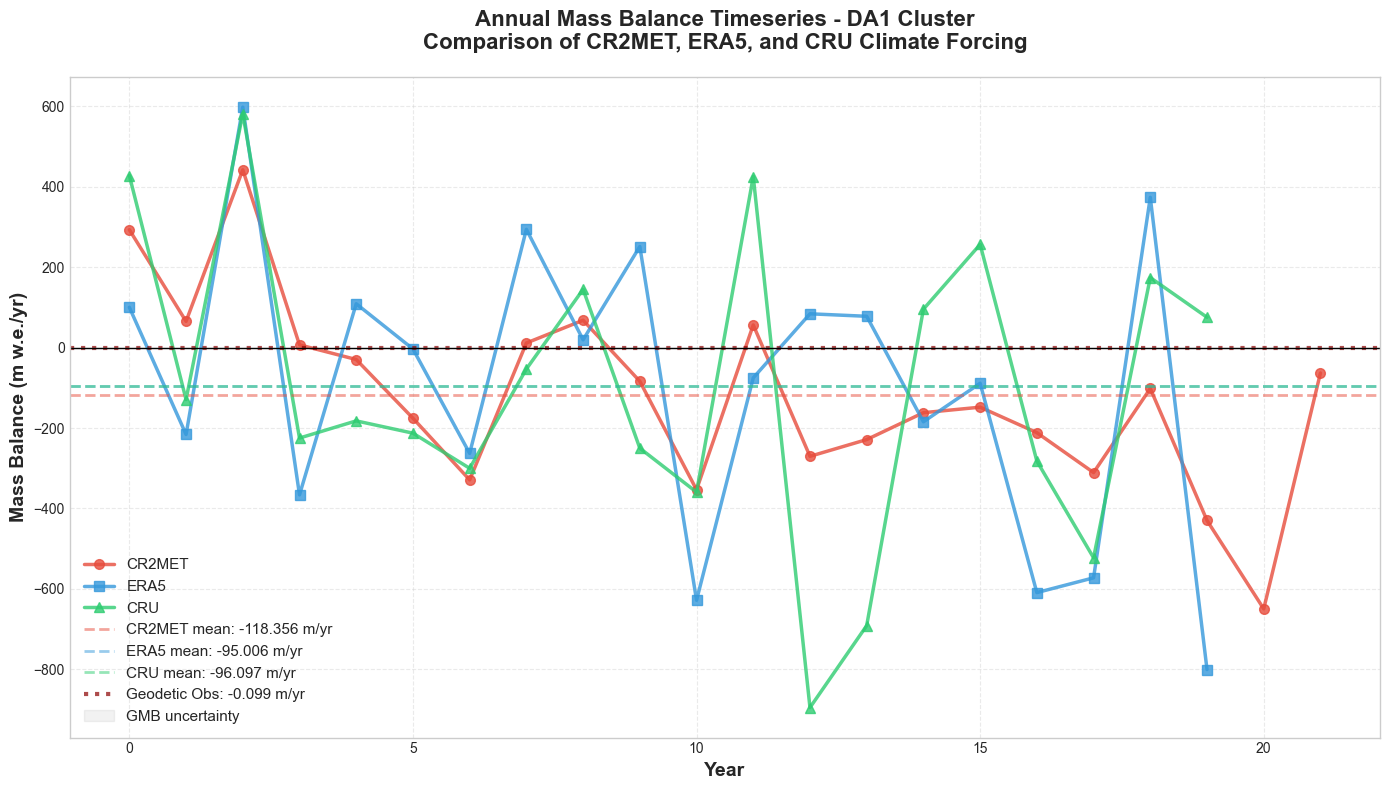

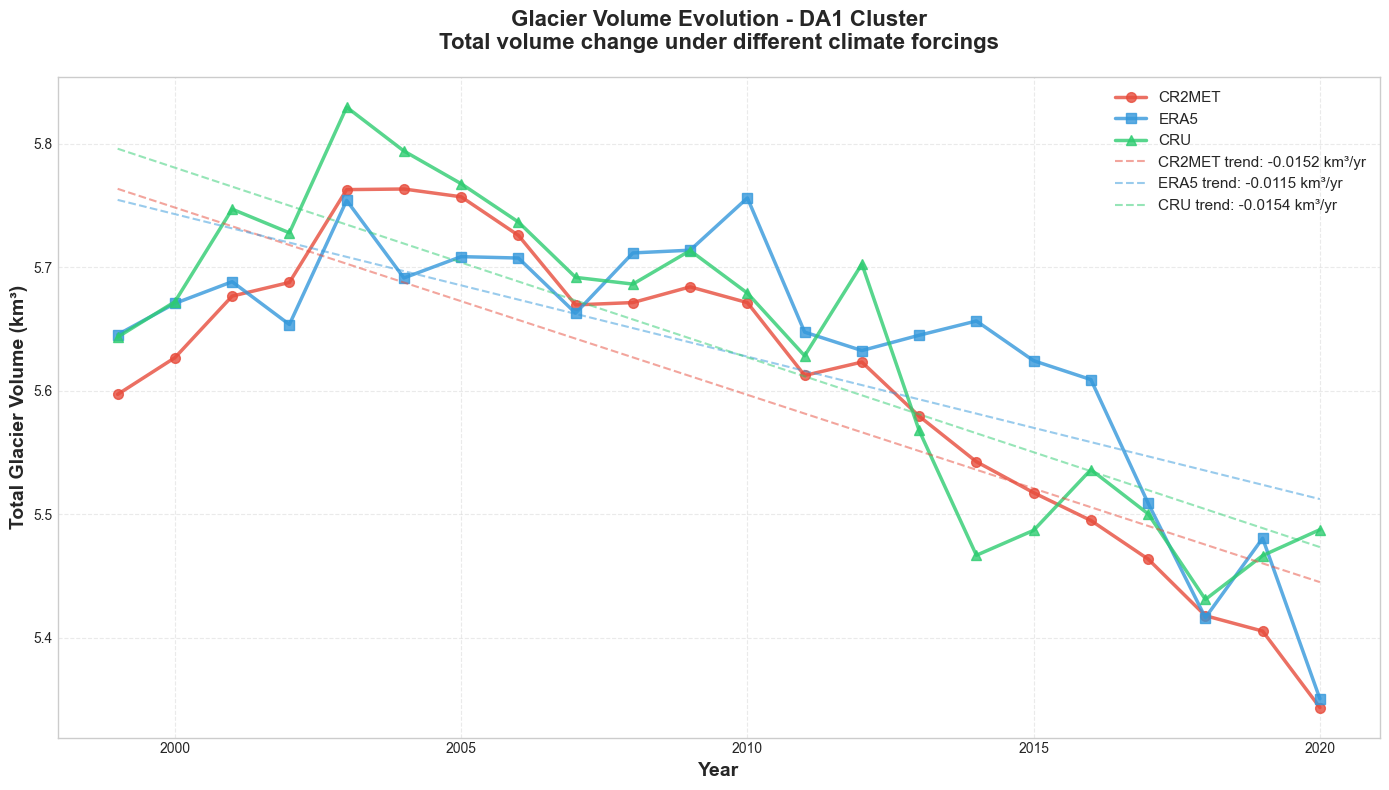

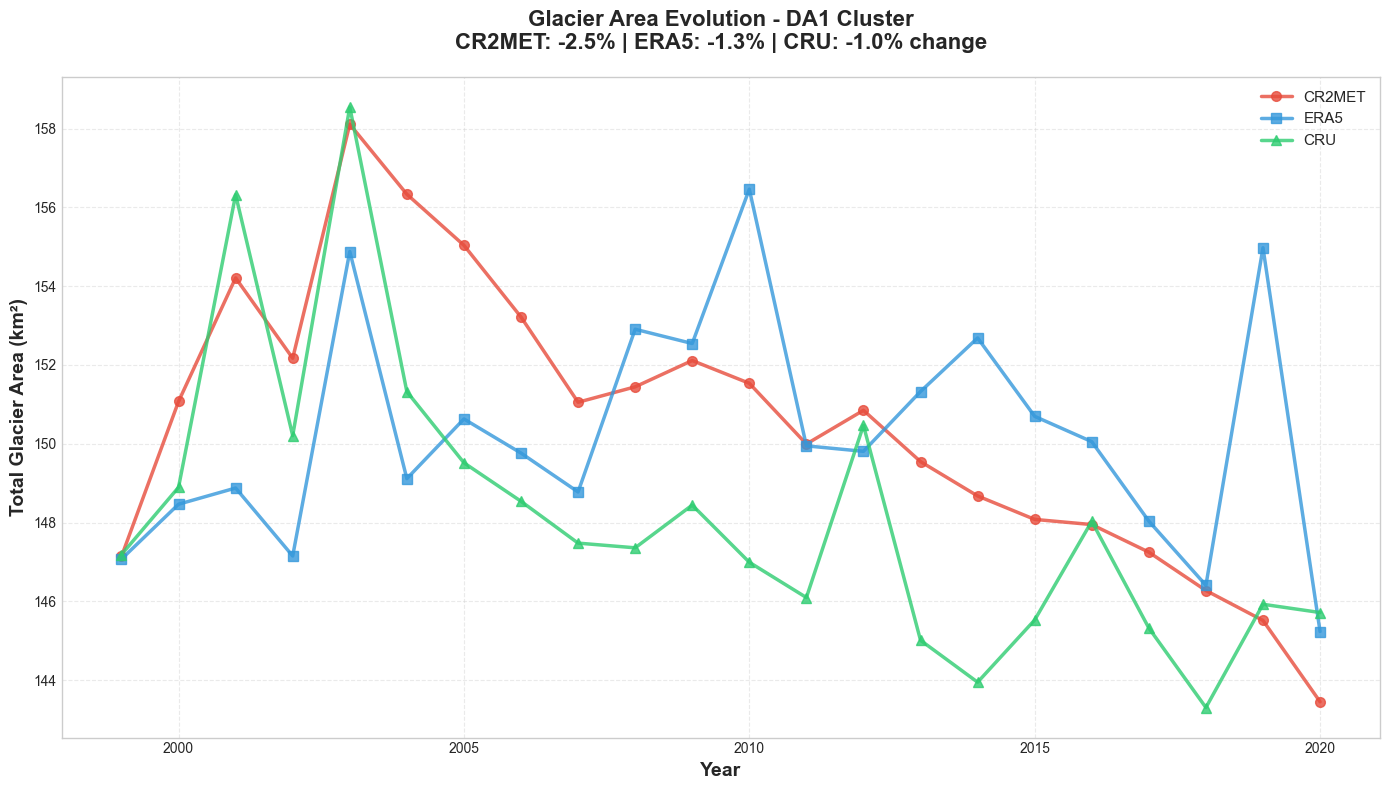

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
==============================================================================
MULTI-DATASET TIMESERIES COMPARISON - DA1 CLUSTER
==============================================================================
This script creates temporal analysis plots comparing CR2MET, ERA5, and CRU
climate datasets to see how they differ over time (2000-2019).

Author: [Your name]
Date: January 2026
Dataset: DA1 Cluster (Chilean Andes)
==============================================================================
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns
from datetime import datetime

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Define output directory
output_dir = '/Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/'

##############################################################################
# SECTION 1: LOAD GEODETIC OBSERVATIONS FOR REFERENCE
##############################################################################
print("\n" + "="*70)
print("LOADING DATA...")
print("="*70)

# Load geodetic mass balance (GMB) - our "ground truth" observations
# This comes from Hugonnet et al. (2021) satellite observations
gmb_file = output_dir + 'CR2MET/DA1/comparacion_gmb_smb_DA1_.csv'
gmb_data = pd.read_csv(gmb_file, header=None)
gmb_value = float(gmb_data[gmb_data[1] == 'GMB'][0].values[0])
gmb_error = float(gmb_data[gmb_data[1] == 'GMB_error'][0].values[0])

print(f"Geodetic observations (2000-2019): {gmb_value:.1f} ± {gmb_error:.1f} mm/yr")

##############################################################################
# SECTION 2: LOAD ANNUAL MASS BALANCE TIMESERIES
##############################################################################
print("\nLoading annual mass balance timeseries...")

# Load area-weighted mean mass balance for each year
# These are the cluster-wide averages calculated in Script 02
cr2_mb_ts = pd.read_csv(output_dir + 'CR2MET/DA1/mb_promedio.csv')
era5_mb_ts = pd.read_csv(output_dir + 'ERA5/DA1/mb_promedio.csv')
cru_mb_ts = pd.read_csv(output_dir + 'CRU/DA1/mb_promedio.csv')

print(f"  CR2MET: {len(cr2_mb_ts)} years")
print(f"  ERA5:   {len(era5_mb_ts)} years")
print(f"  CRU:    {len(cru_mb_ts)} years")

##############################################################################
# SECTION 3: LOAD COMPILED NETCDF FILES WITH FULL GLACIER EVOLUTION
##############################################################################
print("\nLoading compiled NetCDF outputs (volume, area, length)...")

# These NetCDF files contain annual timeseries of glacier geometry changes
# for all glaciers in the cluster, compiled from OGGM simulations
cr2_nc = xr.open_dataset(output_dir + 'CR2MET/DA1/run_output_2000_2019_hydro_TC_DA1.nc')
era5_nc = xr.open_dataset(output_dir + 'ERA5/DA1/run_output_2000_2019_hydro_ERA5_DA1.nc')
cru_nc = xr.open_dataset(output_dir + 'CRU/DA1/run_output_2000_2019_hydro_CRU_DA1.nc')

print("  Variables available in NetCDF files:")
print(f"    {list(cr2_nc.data_vars)}")

##############################################################################
# SECTION 4: EXTRACT CLUSTER-WIDE TOTALS FOR VOLUME AND AREA
##############################################################################
print("\nCalculating cluster-wide totals...")

def calculate_cluster_totals(nc_dataset):
    """
    Calculate total volume and area across all glaciers in the cluster.
    
    Parameters:
    -----------
    nc_dataset : xarray.Dataset
        OGGM compiled output with variables: volume, area, etc.
    
    Returns:
    --------
    pandas.DataFrame with columns: year, volume_km3, area_km2
    """
    # Sum across all glaciers (axis=0 is the glacier dimension)
    total_volume = nc_dataset['volume'].sum(dim='rgi_id') / 1e9  # Convert m³ to km³
    total_area = nc_dataset['area'].sum(dim='rgi_id') / 1e6     # Convert m² to km²
    
    # Get years from time dimension
    years = nc_dataset['time'].values
    
    # Create DataFrame
    df = pd.DataFrame({
        'year': years,
        'volume_km3': total_volume.values,
        'area_km2': total_area.values
    })
    
    return df

# Calculate totals for each dataset
cr2_totals = calculate_cluster_totals(cr2_nc)
era5_totals = calculate_cluster_totals(era5_nc)
cru_totals = calculate_cluster_totals(cru_nc)

print(f"  Initial volume (2000): CR2MET={cr2_totals.iloc[0]['volume_km3']:.2f} km³")
print(f"  Final volume (2019):   CR2MET={cr2_totals.iloc[-1]['volume_km3']:.2f} km³")
print(f"  Volume loss:           {cr2_totals.iloc[0]['volume_km3'] - cr2_totals.iloc[-1]['volume_km3']:.2f} km³")

##############################################################################
# SECTION 5: EXTRACT MONTHLY HYDROLOGY DATA
##############################################################################
print("\nExtracting monthly hydrology (melt, precipitation, runoff)...")

def extract_monthly_hydrology(nc_dataset):
    """
    Extract monthly hydrological fluxes summed across all glaciers.
    
    Parameters:
    -----------
    nc_dataset : xarray.Dataset
        OGGM compiled output with monthly_* variables
    
    Returns:
    --------
    pandas.DataFrame with monthly timeseries of melt, precip, runoff
    """
    # First, let's see what's actually in the dataset
    print(f"    Available variables: {list(nc_dataset.data_vars)}")
    print(f"    Available dimensions: {list(nc_dataset.dims)}")
    
    # Look for monthly hydrology variables
    # In OGGM outputs, these are often stored in the 'calendar_month_2d' dimension
    # or as separate monthly storage variables
    
    monthly_vars = [v for v in nc_dataset.data_vars if 'month' in v.lower()]
    print(f"    Monthly variables found: {monthly_vars}")
    
    if not monthly_vars:
        print("    Warning: No monthly variables found in dataset")
        return None
    
    # Try to find the actual dimension name for months
    sample_var = monthly_vars[0] if monthly_vars else None
    if sample_var:
        dims = nc_dataset[sample_var].dims
        print(f"    Dimensions of '{sample_var}': {dims}")
    
    # Check if we have the standard OGGM monthly hydrology output
    # These are typically stored with dimensions (rgi_id, time, calendar_month_2d)
    if 'calendar_month_2d' in nc_dataset.dims:
        month_dim = 'calendar_month_2d'
    elif 'month_2d' in nc_dataset.dims:
        month_dim = 'month_2d'
    else:
        print("    Warning: Could not find monthly dimension - skipping monthly analysis")
        return None
    
    # Extract and sum monthly fluxes across all glaciers
    melt = None
    rain = None
    snow = None
    
    # Try different variable name conventions
    for melt_name in ['melt_on_glacier', 'melt_on_glacier_monthly']:
        if melt_name in nc_dataset:
            melt = nc_dataset[melt_name].sum(dim='rgi_id')
            print(f"    Found melt data: {melt_name}")
            break
    
    for rain_name in ['liq_prcp_on_glacier', 'liq_prcp_on_glacier_monthly']:
        if rain_name in nc_dataset:
            rain = nc_dataset[rain_name].sum(dim='rgi_id')
            print(f"    Found rain data: {rain_name}")
            break
    
    for snow_name in ['snowfall_on_glacier', 'snowfall_on_glacier_monthly']:
        if snow_name in nc_dataset:
            snow = nc_dataset[snow_name].sum(dim='rgi_id')
            print(f"    Found snow data: {snow_name}")
            break
    
    if melt is None and rain is None:
        print("    Warning: No melt or rain data found")
        return None
    
    # Get years from time dimension
    years = nc_dataset['time'].values
    
    # Build DataFrame
    monthly_data = []
    for i, year in enumerate(years):
        for month in range(12):
            date = pd.Timestamp(year=int(year), month=month+1, day=15)
            row = {'date': date, 'year': int(year), 'month': month+1}
            
            try:
                if melt is not None:
                    # Use the correct dimension name
                    row['melt_kg'] = float(melt.isel(time=i).isel({month_dim: month}).values)
                if rain is not None:
                    row['rain_kg'] = float(rain.isel(time=i).isel({month_dim: month}).values)
                if snow is not None:
                    row['snow_kg'] = float(snow.isel(time=i).isel({month_dim: month}).values)
            except Exception as e:
                print(f"    Warning: Could not extract month {month+1} of year {year}: {e}")
                continue
            
            monthly_data.append(row)
    
    if not monthly_data:
        print("    Warning: No monthly data extracted")
        return None
    
    df = pd.DataFrame(monthly_data)
    
    # Calculate total runoff (melt + rain)
    if 'melt_kg' in df.columns and 'rain_kg' in df.columns:
        df['runoff_kg'] = df['melt_kg'] + df['rain_kg']
    
    return df

# Extract monthly data for each dataset
cr2_monthly = extract_monthly_hydrology(cr2_nc)
era5_monthly = extract_monthly_hydrology(era5_nc)
cru_monthly = extract_monthly_hydrology(cru_nc)

if cr2_monthly is not None:
    print(f"  Monthly data extracted: {len(cr2_monthly)} months")
    print(f"  Available columns: {list(cr2_monthly.columns)}")

##############################################################################
# SECTION 6: CALCULATE PERIOD MEANS FOR EACH DATASET
##############################################################################
print("\nCalculating period means (2000-2019)...")

# First check what columns are actually in the dataframe
print(f"  CR2MET columns: {list(cr2_mb_ts.columns)}")
print(f"  ERA5 columns: {list(era5_mb_ts.columns)}")

# The column might be named differently - check for common variations
mb_col = None
for possible_name in ['mb_mean', 'mean', 'MB', 'mass_balance', 'mb']:
    if possible_name in cr2_mb_ts.columns:
        mb_col = possible_name
        break

if mb_col is None:
    # If still not found, just use the second column (first is usually 'year')
    mb_col = cr2_mb_ts.columns[1]
    print(f"  Using column: {mb_col}")

# Mass balance period means
cr2_mb_mean = cr2_mb_ts[mb_col].mean()
era5_mb_mean = era5_mb_ts[mb_col].mean()
cru_mb_mean = cru_mb_ts[mb_col].mean()

print(f"  CR2MET mean MB:  {cr2_mb_mean:.3f} m w.e./yr")
print(f"  ERA5 mean MB:    {era5_mb_mean:.3f} m w.e./yr")
print(f"  CRU mean MB:     {cru_mb_mean:.3f} m w.e./yr")

# Volume change rates (km³/yr)
cr2_vol_change = (cr2_totals.iloc[-1]['volume_km3'] - cr2_totals.iloc[0]['volume_km3']) / len(cr2_totals)
era5_vol_change = (era5_totals.iloc[-1]['volume_km3'] - era5_totals.iloc[0]['volume_km3']) / len(era5_totals)
cru_vol_change = (cru_totals.iloc[-1]['volume_km3'] - cru_totals.iloc[0]['volume_km3']) / len(cru_totals)

print(f"  CR2MET volume change:  {cr2_vol_change:.4f} km³/yr")
print(f"  ERA5 volume change:    {era5_vol_change:.4f} km³/yr")
print(f"  CRU volume change:     {cru_vol_change:.4f} km³/yr")

##############################################################################
# PLOT 1: ANNUAL MASS BALANCE TIMESERIES
##############################################################################
print("\nCreating Plot 1: Annual Mass Balance Timeseries...")

fig1, ax1 = plt.subplots(figsize=(14, 8))

# Define colors for consistency
colors = {'CR2MET': '#e74c3c', 'ERA5': '#3498db', 'CRU': '#2ecc71'}

# Get year column name (first column is usually year)
year_col = cr2_mb_ts.columns[0]

# Plot annual mass balance timeseries for each dataset
ax1.plot(cr2_mb_ts[year_col], cr2_mb_ts[mb_col], 'o-', 
         color=colors['CR2MET'], linewidth=2.5, markersize=7, 
         label='CR2MET', alpha=0.8)
ax1.plot(era5_mb_ts[year_col], era5_mb_ts[mb_col], 's-', 
         color=colors['ERA5'], linewidth=2.5, markersize=7, 
         label='ERA5', alpha=0.8)
ax1.plot(cru_mb_ts[year_col], cru_mb_ts[mb_col], '^-', 
         color=colors['CRU'], linewidth=2.5, markersize=7, 
         label='CRU', alpha=0.8)

# Add period mean lines for each dataset (horizontal reference lines)
ax1.axhline(y=cr2_mb_mean, color=colors['CR2MET'], linestyle='--', 
           linewidth=2, alpha=0.5, label=f'CR2MET mean: {cr2_mb_mean:.3f} m/yr')
ax1.axhline(y=era5_mb_mean, color=colors['ERA5'], linestyle='--', 
           linewidth=2, alpha=0.5, label=f'ERA5 mean: {era5_mb_mean:.3f} m/yr')
ax1.axhline(y=cru_mb_mean, color=colors['CRU'], linestyle='--', 
           linewidth=2, alpha=0.5, label=f'CRU mean: {cru_mb_mean:.3f} m/yr')

# Add geodetic observation reference (converted to m/yr)
ax1.axhline(y=gmb_value/1000, color='darkred', linestyle=':', 
           linewidth=3, label=f'Geodetic Obs: {gmb_value/1000:.3f} m/yr', alpha=0.7)
ax1.axhspan((gmb_value - gmb_error)/1000, (gmb_value + gmb_error)/1000, 
           alpha=0.1, color='gray', label='GMB uncertainty')

# Formatting
ax1.set_xlabel('Year', fontsize=14, fontweight='bold')
ax1.set_ylabel('Mass Balance (m w.e./yr)', fontsize=14, fontweight='bold')
ax1.set_title('Annual Mass Balance Timeseries - DA1 Cluster\n' + 
             'Comparison of CR2MET, ERA5, and CRU Climate Forcing',
             fontsize=16, fontweight='bold', pad=20)
ax1.legend(loc='best', fontsize=11, framealpha=0.95)
ax1.grid(True, alpha=0.4, linestyle='--')
ax1.axhline(y=0, color='black', linewidth=1)

plt.tight_layout()
plt.savefig(output_dir + 'Timeseries_01_Mass_Balance_DA1.png', dpi=300, bbox_inches='tight')
print("  ✓ Saved: Timeseries_01_Mass_Balance_DA1.png")

##############################################################################
# PLOT 2: GLACIER VOLUME EVOLUTION
##############################################################################
print("\nCreating Plot 2: Volume Evolution...")

fig2, ax2 = plt.subplots(figsize=(14, 8))

# Plot total glacier volume over time
ax2.plot(cr2_totals['year'], cr2_totals['volume_km3'], 'o-', 
         color=colors['CR2MET'], linewidth=2.5, markersize=7, 
         label='CR2MET', alpha=0.8)
ax2.plot(era5_totals['year'], era5_totals['volume_km3'], 's-', 
         color=colors['ERA5'], linewidth=2.5, markersize=7, 
         label='ERA5', alpha=0.8)
ax2.plot(cru_totals['year'], cru_totals['volume_km3'], '^-', 
         color=colors['CRU'], linewidth=2.5, markersize=7, 
         label='CRU', alpha=0.8)

# Add trend lines (linear fit)
from scipy.stats import linregress

for name, totals, color in [('CR2MET', cr2_totals, colors['CR2MET']),
                              ('ERA5', era5_totals, colors['ERA5']),
                              ('CRU', cru_totals, colors['CRU'])]:
    slope, intercept, r_value, p_value, std_err = linregress(totals['year'], totals['volume_km3'])
    trend_line = slope * totals['year'] + intercept
    ax2.plot(totals['year'], trend_line, '--', color=color, linewidth=1.5, 
            alpha=0.5, label=f'{name} trend: {slope:.4f} km³/yr')

# Formatting
ax2.set_xlabel('Year', fontsize=14, fontweight='bold')
ax2.set_ylabel('Total Glacier Volume (km³)', fontsize=14, fontweight='bold')
ax2.set_title('Glacier Volume Evolution - DA1 Cluster\n' + 
             'Total volume change under different climate forcings',
             fontsize=16, fontweight='bold', pad=20)
ax2.legend(loc='best', fontsize=11, framealpha=0.95)
ax2.grid(True, alpha=0.4, linestyle='--')

plt.tight_layout()
plt.savefig(output_dir + 'Timeseries_02_Volume_Evolution_DA1.png', dpi=300, bbox_inches='tight')
print("  ✓ Saved: Timeseries_02_Volume_Evolution_DA1.png")

##############################################################################
# PLOT 3: GLACIER AREA EVOLUTION
##############################################################################
print("\nCreating Plot 3: Area Evolution...")

fig3, ax3 = plt.subplots(figsize=(14, 8))

# Plot total glacier area over time
ax3.plot(cr2_totals['year'], cr2_totals['area_km2'], 'o-', 
         color=colors['CR2MET'], linewidth=2.5, markersize=7, 
         label='CR2MET', alpha=0.8)
ax3.plot(era5_totals['year'], era5_totals['area_km2'], 's-', 
         color=colors['ERA5'], linewidth=2.5, markersize=7, 
         label='ERA5', alpha=0.8)
ax3.plot(cru_totals['year'], cru_totals['area_km2'], '^-', 
         color=colors['CRU'], linewidth=2.5, markersize=7, 
         label='CRU', alpha=0.8)

# Calculate percent change
cr2_area_pct = ((cr2_totals.iloc[-1]['area_km2'] - cr2_totals.iloc[0]['area_km2']) / 
                cr2_totals.iloc[0]['area_km2'] * 100)
era5_area_pct = ((era5_totals.iloc[-1]['area_km2'] - era5_totals.iloc[0]['area_km2']) / 
                 era5_totals.iloc[0]['area_km2'] * 100)
cru_area_pct = ((cru_totals.iloc[-1]['area_km2'] - cru_totals.iloc[0]['area_km2']) / 
                cru_totals.iloc[0]['area_km2'] * 100)

# Formatting
ax3.set_xlabel('Year', fontsize=14, fontweight='bold')
ax3.set_ylabel('Total Glacier Area (km²)', fontsize=14, fontweight='bold')
ax3.set_title('Glacier Area Evolution - DA1 Cluster\n' + 
             f'CR2MET: {cr2_area_pct:.1f}% | ERA5: {era5_area_pct:.1f}% | CRU: {cru_area_pct:.1f}% change',
             fontsize=16, fontweight='bold', pad=20)
ax3.legend(loc='best', fontsize=11, framealpha=0.95)
ax3.grid(True, alpha=0.4, linestyle='--')

plt.tight_layout()
plt.savefig(output_dir + 'Timeseries_03_Area_Evolution_DA1.png', dpi=300, bbox_inches='tight')
print("  ✓ Saved: Timeseries_03_Area_Evolution_DA1.png")

##############################################################################
# PLOT 4: MONTHLY HYDROLOGY - TOTAL RUNOFF
##############################################################################
print("\nCreating Plot 4: Monthly Runoff Timeseries...")

if cr2_monthly is not None and 'runoff_kg' in cr2_monthly.columns:
    fig4, ax4 = plt.subplots(figsize=(16, 8))
    
    # Convert kg to Gt (gigatonnes) for better readability: 1 Gt = 1e12 kg
    cr2_monthly['runoff_Gt'] = cr2_monthly['runoff_kg'] / 1e12
    era5_monthly['runoff_Gt'] = era5_monthly['runoff_kg'] / 1e12
    cru_monthly['runoff_Gt'] = cru_monthly['runoff_kg'] / 1e12
    
    # Plot monthly runoff
    ax4.plot(cr2_monthly['date'], cr2_monthly['runoff_Gt'], '-', 
             color=colors['CR2MET'], linewidth=1.5, label='CR2MET', alpha=0.7)
    ax4.plot(era5_monthly['date'], era5_monthly['runoff_Gt'], '-', 
             color=colors['ERA5'], linewidth=1.5, label='ERA5', alpha=0.7)
    ax4.plot(cru_monthly['date'], cru_monthly['runoff_Gt'], '-', 
             color=colors['CRU'], linewidth=1.5, label='CRU', alpha=0.7)
    
    # Formatting
    ax4.set_xlabel('Date', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Total Runoff (Gt/month)', fontsize=14, fontweight='bold')
    ax4.set_title('Monthly Glacier Runoff - DA1 Cluster\n' + 
                 'Total runoff = glacier melt + rainfall on glacier',
                 fontsize=16, fontweight='bold', pad=20)
    ax4.legend(loc='best', fontsize=11, framealpha=0.95)
    ax4.grid(True, alpha=0.4, linestyle='--')
    
    plt.tight_layout()
    plt.savefig(output_dir + 'Timeseries_04_Monthly_Runoff_DA1.png', dpi=300, bbox_inches='tight')
    print("  ✓ Saved: Timeseries_04_Monthly_Runoff_DA1.png")
else:
    print("  ⚠ Warning: Monthly runoff data not available - skipping Plot 4")

##############################################################################
# PLOT 5: MONTHLY COMPONENTS - MELT VS RAIN
##############################################################################
print("\nCreating Plot 5: Melt vs Rain Comparison...")

if cr2_monthly is not None and 'melt_kg' in cr2_monthly.columns:
    fig5, (ax5a, ax5b) = plt.subplots(2, 1, figsize=(16, 12))
    
    # Convert to Gt
    for df in [cr2_monthly, era5_monthly, cru_monthly]:
        df['melt_Gt'] = df['melt_kg'] / 1e12
        df['rain_Gt'] = df['rain_kg'] / 1e12
    
    # TOP PANEL: Glacier Melt
    ax5a.plot(cr2_monthly['date'], cr2_monthly['melt_Gt'], '-', 
              color=colors['CR2MET'], linewidth=1.5, label='CR2MET', alpha=0.7)
    ax5a.plot(era5_monthly['date'], era5_monthly['melt_Gt'], '-', 
              color=colors['ERA5'], linewidth=1.5, label='ERA5', alpha=0.7)
    ax5a.plot(cru_monthly['date'], cru_monthly['melt_Gt'], '-', 
              color=colors['CRU'], linewidth=1.5, label='CRU', alpha=0.7)
    
    ax5a.set_ylabel('Glacier Melt (Gt/month)', fontsize=13, fontweight='bold')
    ax5a.set_title('Monthly Glacier Melt - DA1 Cluster', 
                   fontsize=14, fontweight='bold')
    ax5a.legend(loc='best', fontsize=10, framealpha=0.95)
    ax5a.grid(True, alpha=0.4, linestyle='--')
    
    # BOTTOM PANEL: Rainfall on Glacier
    ax5b.plot(cr2_monthly['date'], cr2_monthly['rain_Gt'], '-', 
              color=colors['CR2MET'], linewidth=1.5, label='CR2MET', alpha=0.7)
    ax5b.plot(era5_monthly['date'], era5_monthly['rain_Gt'], '-', 
              color=colors['ERA5'], linewidth=1.5, label='ERA5', alpha=0.7)
    ax5b.plot(cru_monthly['date'], cru_monthly['rain_Gt'], '-', 
              color=colors['CRU'], linewidth=1.5, label='CRU', alpha=0.7)
    
    ax5b.set_xlabel('Date', fontsize=13, fontweight='bold')
    ax5b.set_ylabel('Rainfall on Glacier (Gt/month)', fontsize=13, fontweight='bold')
    ax5b.set_title('Monthly Rainfall on Glacier - DA1 Cluster', 
                   fontsize=14, fontweight='bold')
    ax5b.legend(loc='best', fontsize=10, framealpha=0.95)
    ax5b.grid(True, alpha=0.4, linestyle='--')
    
    plt.tight_layout()
    plt.savefig(output_dir + 'Timeseries_05_Melt_vs_Rain_DA1.png', dpi=300, bbox_inches='tight')
    print("  ✓ Saved: Timeseries_05_Melt_vs_Rain_DA1.png")
else:
    print("  ⚠ Warning: Monthly melt/rain data not available - skipping Plot 5")

##############################################################################
# PLOT 6: SEASONAL CYCLE (MEAN ANNUAL PATTERN)
##############################################################################
print("\nCreating Plot 6: Mean Seasonal Cycle...")

if cr2_monthly is not None and 'melt_kg' in cr2_monthly.columns:
    fig6, (ax6a, ax6b) = plt.subplots(1, 2, figsize=(16, 7))
    
    # Calculate mean monthly values across all years
    cr2_seasonal_melt = cr2_monthly.groupby('month')['melt_Gt'].mean()
    era5_seasonal_melt = era5_monthly.groupby('month')['melt_Gt'].mean()
    cru_seasonal_melt = cru_monthly.groupby('month')['melt_Gt'].mean()
    
    cr2_seasonal_rain = cr2_monthly.groupby('month')['rain_Gt'].mean()
    era5_seasonal_rain = era5_monthly.groupby('month')['rain_Gt'].mean()
    cru_seasonal_rain = cru_monthly.groupby('month')['rain_Gt'].mean()
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # LEFT PANEL: Mean seasonal melt cycle
    ax6a.plot(range(1, 13), cr2_seasonal_melt, 'o-', 
              color=colors['CR2MET'], linewidth=2.5, markersize=8, 
              label='CR2MET', alpha=0.8)
    ax6a.plot(range(1, 13), era5_seasonal_melt, 's-', 
              color=colors['ERA5'], linewidth=2.5, markersize=8, 
              label='ERA5', alpha=0.8)
    ax6a.plot(range(1, 13), cru_seasonal_melt, '^-', 
              color=colors['CRU'], linewidth=2.5, markersize=8, 
              label='CRU', alpha=0.8)
    
    ax6a.set_xlabel('Month', fontsize=13, fontweight='bold')
    ax6a.set_ylabel('Mean Monthly Melt (Gt)', fontsize=13, fontweight='bold')
    ax6a.set_title('Mean Seasonal Melt Cycle\n(Average 2000-2019)', 
                   fontsize=14, fontweight='bold')
    ax6a.set_xticks(range(1, 13))
    ax6a.set_xticklabels(months, rotation=45)
    ax6a.legend(loc='best', fontsize=10)
    ax6a.grid(True, alpha=0.4, linestyle='--')
    
    # RIGHT PANEL: Mean seasonal rain cycle
    ax6b.plot(range(1, 13), cr2_seasonal_rain, 'o-', 
              color=colors['CR2MET'], linewidth=2.5, markersize=8, 
              label='CR2MET', alpha=0.8)
    ax6b.plot(range(1, 13), era5_seasonal_rain, 's-', 
              color=colors['ERA5'], linewidth=2.5, markersize=8, 
              label='ERA5', alpha=0.8)
    ax6b.plot(range(1, 13), cru_seasonal_rain, '^-', 
              color=colors['CRU'], linewidth=2.5, markersize=8, 
              label='CRU', alpha=0.8)
    
    ax6b.set_xlabel('Month', fontsize=13, fontweight='bold')
    ax6b.set_ylabel('Mean Monthly Rain (Gt)', fontsize=13, fontweight='bold')
    ax6b.set_title('Mean Seasonal Rain Cycle\n(Average 2000-2019)', 
                   fontsize=14, fontweight='bold')
    ax6b.set_xticks(range(1, 13))
    ax6b.set_xticklabels(months, rotation=45)
    ax6b.legend(loc='best', fontsize=10)
    ax6b.grid(True, alpha=0.4, linestyle='--')
    
    plt.tight_layout()
    plt.savefig(output_dir + 'Timeseries_06_Seasonal_Cycle_DA1.png', dpi=300, bbox_inches='tight')
    print("  ✓ Saved: Timeseries_06_Seasonal_Cycle_DA1.png")
else:
    print("  ⚠ Warning: Monthly data not available - skipping Plot 6")

##############################################################################
# SUMMARY TABLE: SAVE KEY STATISTICS
##############################################################################
print("\nCreating summary statistics table...")

summary_stats = pd.DataFrame({
    'Dataset': ['CR2MET', 'ERA5', 'CRU'],
    'Mean MB (m/yr)': [cr2_mb_mean, era5_mb_mean, cru_mb_mean],
    'Volume Change (km³)': [
        cr2_totals.iloc[-1]['volume_km3'] - cr2_totals.iloc[0]['volume_km3'],
        era5_totals.iloc[-1]['volume_km3'] - era5_totals.iloc[0]['volume_km3'],
        cru_totals.iloc[-1]['volume_km3'] - cru_totals.iloc[0]['volume_km3']
    ],
    'Area Change (km²)': [
        cr2_totals.iloc[-1]['area_km2'] - cr2_totals.iloc[0]['area_km2'],
        era5_totals.iloc[-1]['area_km2'] - era5_totals.iloc[0]['area_km2'],
        cru_totals.iloc[-1]['area_km2'] - cru_totals.iloc[0]['area_km2']
    ],
    'Area Change (%)': [cr2_area_pct, era5_area_pct, cru_area_pct]
})

if cr2_monthly is not None and 'melt_kg' in cr2_monthly.columns:
    summary_stats['Total Melt (Gt)'] = [
        cr2_monthly['melt_Gt'].sum(),
        era5_monthly['melt_Gt'].sum(),
        cru_monthly['melt_Gt'].sum()
    ]
    summary_stats['Total Rain (Gt)'] = [
        cr2_monthly['rain_Gt'].sum(),
        era5_monthly['rain_Gt'].sum(),
        cru_monthly['rain_Gt'].sum()
    ]

summary_stats.to_csv(output_dir + 'Timeseries_Summary_Statistics_DA1.csv', index=False)
print("\n  ✓ Saved: Timeseries_Summary_Statistics_DA1.csv")

print("\n" + "="*70)
print("TIMESERIES ANALYSIS COMPLETE!")
print("="*70)
print(f"\nAll plots saved to: {output_dir}")
print("\nPlots created:")
print("  1. Timeseries_01_Mass_Balance_DA1.png - Annual MB timeseries")
print("  2. Timeseries_02_Volume_Evolution_DA1.png - Volume change over time")
print("  3. Timeseries_03_Area_Evolution_DA1.png - Area change over time")
if cr2_monthly is not None:
    print("  4. Timeseries_04_Monthly_Runoff_DA1.png - Monthly runoff (melt + rain)")
    print("  5. Timeseries_05_Melt_vs_Rain_DA1.png - Separate melt and rain")
    print("  6. Timeseries_06_Seasonal_Cycle_DA1.png - Mean seasonal patterns")
print("  Summary table: Timeseries_Summary_Statistics_DA1.csv")
print("="*70)

# Show summary statistics
print("\nSUMMARY STATISTICS:")
print(summary_stats.to_string(index=False))

plt.show()


## Some quick plots for the regions I've run with CR2met 


EXTRACTING DATA FROM NETCDF FILES

DA1:
  ✓ Opened NetCDF
  SMB: -93.8 mm/yr
  GMB: -98.7 ± 152.6 mm/yr
  Glaciers: 422

DA2:
  ✓ Opened NetCDF
  SMB: -287.5 mm/yr
  GMB: -290.1 ± 146.0 mm/yr
  Glaciers: 200

DA3:
  ✓ Opened NetCDF
  SMB: -449.9 mm/yr
  GMB: -556.2 ± 157.5 mm/yr
  Glaciers: 410

WA1:
  ✓ Opened NetCDF
  SMB: -430.8 mm/yr
  GMB: -404.2 ± 159.4 mm/yr
  Glaciers: 678

WA2:
  ✓ Opened NetCDF
  SMB: -660.9 mm/yr
  GMB: -640.3 ± 201.0 mm/yr
  Glaciers: 2924

WA3:
  ✓ Opened NetCDF
  SMB: -1225.0 mm/yr
  GMB: -1082.4 ± 144.1 mm/yr
  Glaciers: 447


Total clusters loaded: 6

✓ Saved: /Users/milliespencer/Desktop/CR2_OGGM_Paper/CR2MET_Clusters_Simple.png

RESULTS
DA1: SMB=-93.8, GMB=-98.7, Bias=+4.9
DA2: SMB=-287.5, GMB=-290.1, Bias=+2.5
DA3: SMB=-449.9, GMB=-556.2, Bias=+106.2
WA1: SMB=-430.8, GMB=-404.2, Bias=-26.6
WA2: SMB=-660.9, GMB=-640.3, Bias=-20.6
WA3: SMB=-1225.0, GMB=-1082.4, Bias=-142.6


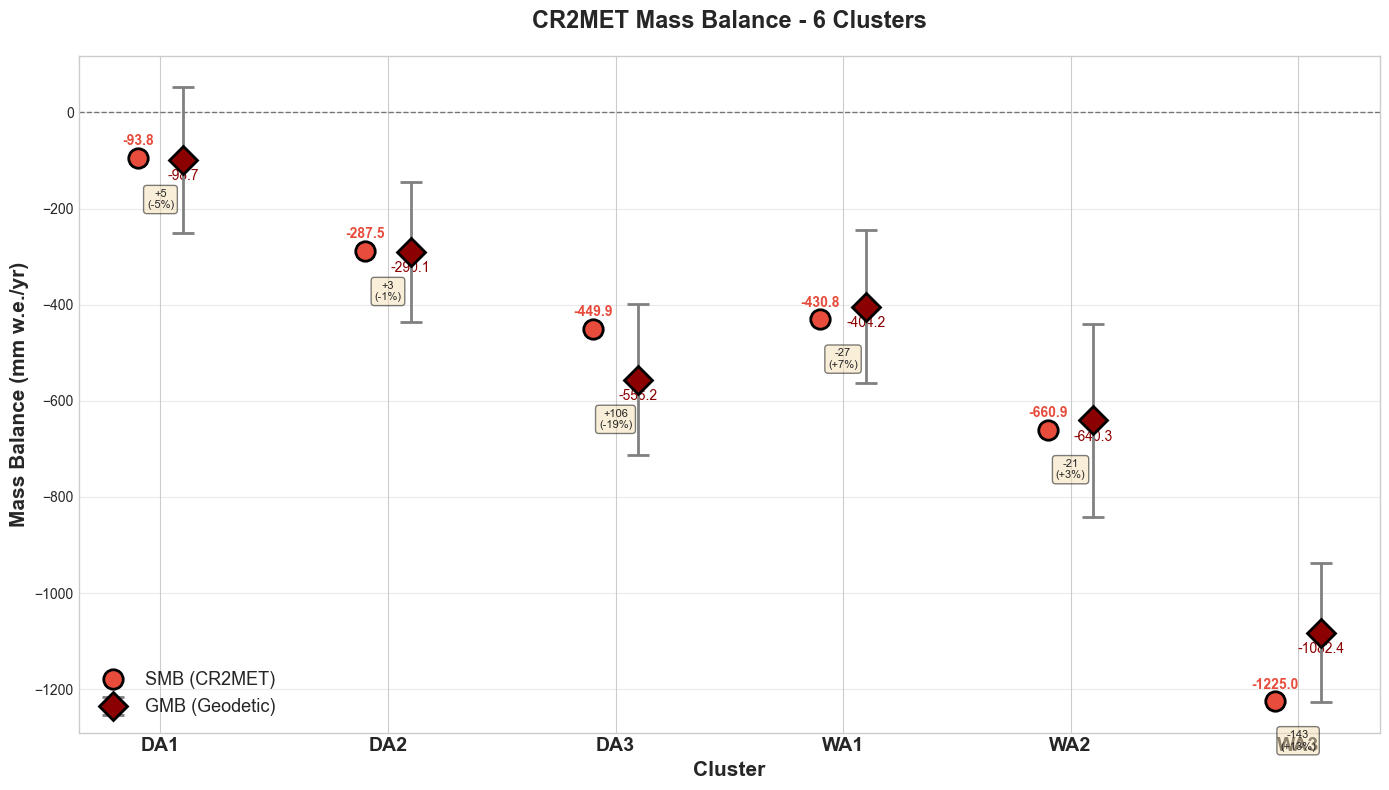

In [17]:
#!/usr/bin/env python3
"""
Simple NetCDF-only plotter - extracts mass balance directly from NetCDF
"""

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from oggm import utils
import warnings

if not hasattr(np, 'warnings'):
    np.warnings = warnings

print("\n" + "="*70)
print("EXTRACTING DATA FROM NETCDF FILES")
print("="*70)

# Clusters and their NetCDF file paths
clusters_to_check = {
    'DA1': '/Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/CR2MET/DA1/run_output_2000_2019_hydro_TC_DA1.nc',
    'DA2': '/Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/CR2MET/DA2/run_output_2000_2019_hydro_TC_DA2.nc',
    'DA3': '/Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/CR2MET/DA3/run_output_2000_2019_hydro_TC_DA3.nc',
    'WA1': '/Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/CR2MET/WA1/run_output_2000_2019_hydro_TC_WA1.nc',
    'WA2': '/Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/CR2MET/WA2/run_output_2000_2019_hydro_TC_WA2.nc',
    'WA3': '/Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/CR2MET/WA3/run_output_2000_2019_hydro_TC_WA3.nc',
}

# Load RGI data
rgi_file = '/Users/milliespencer/Desktop/CR2_OGGM_Paper/files_chile_OGGM_climate_comparison/RGI_BNA_Clusters.csv'
datos_rgi = pd.read_csv(rgi_file)

# Load geodetic data
utils.get_geodetic_mb_dataframe()
geodetic_ref = utils.get_geodetic_mb_dataframe()
geodetic_ref = geodetic_ref[geodetic_ref['period'] == '2000-01-01_2020-01-01']

results = []

for cluster, nc_path in clusters_to_check.items():
    print(f"\n{cluster}:")
    
    try:
        # Open NetCDF
        ds = xr.open_dataset(nc_path)
        print(f"  ✓ Opened NetCDF")
        
        # Get glacier IDs
        glacier_ids = [str(x) for x in ds['rgi_id'].values]
        n_glaciers = len(glacier_ids)
        
        # Calculate mass balance for 2000-2020 (matching calibration period)
        volume_2000 = ds['volume'].sel(time=2000).sum()
        volume_2020 = ds['volume'].sel(time=2020).sum()
        area_2000 = ds['area'].sel(time=2000)
        
        # Volume change in m³, divide by total area and time to get m w.e./yr
        total_area_m2 = area_2000.sum().values
        n_years = 20  # 2000-2020 period (matches calibration)
        
        # SMB in m w.e./yr, then convert to mm/yr
        smb_m_per_yr = (volume_2020 - volume_2000) / total_area_m2 / n_years
        smb_mm_per_yr = float(smb_m_per_yr * 1000)
        
        print(f"  SMB: {smb_mm_per_yr:.1f} mm/yr")
        
        # Get cluster glaciers from RGI
        cluster_glaciers = datos_rgi[datos_rgi['Cluster'] == cluster]['RGIId'].tolist()
        
        # Get geodetic observations
        gmb_data = geodetic_ref[geodetic_ref.index.isin(cluster_glaciers)]
        
        if len(gmb_data) > 0:
            gmb_weighted = np.average(gmb_data['dmdtda'] * 1000, weights=gmb_data['area'])
            gmb_error = np.average(gmb_data['err_dmdtda'] * 1000, weights=gmb_data['area'])
            
            print(f"  GMB: {gmb_weighted:.1f} ± {gmb_error:.1f} mm/yr")
            print(f"  Glaciers: {n_glaciers}")
            
            results.append({
                'cluster': cluster,
                'SMB': smb_mm_per_yr,
                'GMB': gmb_weighted,
                'GMB_error': gmb_error,
                'n_glaciers': n_glaciers,
                'area_km2': float(total_area_m2 / 1e6)
            })
        else:
            print(f"  ⚠ No geodetic data")
        
        ds.close()
        
    except FileNotFoundError:
        print(f"  ✗ File not found")
    except Exception as e:
        print(f"  ✗ Error: {e}")

print(f"\n\nTotal clusters loaded: {len(results)}")

if len(results) == 0:
    print("❌ No data to plot!")
    exit(1)

##############################################################################
# PLOT
##############################################################################

df = pd.DataFrame(results)

fig, ax = plt.subplots(figsize=(14, 8))

n = len(df)
x_pos = np.arange(n)

# SMB - circles
ax.plot(x_pos - 0.1, df['SMB'], 'o', markersize=14, color='#e74c3c', 
       markeredgecolor='black', markeredgewidth=2, label='SMB (CR2MET)', zorder=5)

# GMB - diamonds with error bars
ax.errorbar(x_pos + 0.1, df['GMB'], yerr=df['GMB_error'],
           fmt='D', markersize=14, color='darkred',
           markeredgecolor='black', markeredgewidth=2,
           ecolor='gray', capsize=8, capthick=2,
           linewidth=2, label='GMB (Geodetic)', zorder=10)

ax.axhline(y=0, color='black', linewidth=1, linestyle='--', alpha=0.5)

ax.set_ylabel('Mass Balance (mm w.e./yr)', fontsize=15, fontweight='bold')
ax.set_xlabel('Cluster', fontsize=15, fontweight='bold')
ax.set_title(f'CR2MET Mass Balance - {n} Clusters', fontsize=17, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(df['cluster'], fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=13)
ax.grid(axis='y', alpha=0.4)

# Labels
for i, row in df.iterrows():
    ax.text(i - 0.1, row['SMB'] + 20, f"{row['SMB']:.1f}", 
           ha='center', va='bottom', fontweight='bold', fontsize=10, color='#e74c3c')
    ax.text(i + 0.1, row['GMB'] - 20, f"{row['GMB']:.1f}", 
           ha='center', va='top', fontsize=10, color='darkred')
    
    bias = row['SMB'] - row['GMB']
    bias_pct = (bias / row['GMB']) * 100
    ax.text(i, min(row['SMB'], row['GMB']) - 60, f'{bias:+.0f}\n({bias_pct:+.0f}%)',
           ha='center', va='top', fontsize=8,
           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()

output = '/Users/milliespencer/Desktop/CR2_OGGM_Paper/CR2MET_Clusters_Simple.png'
plt.savefig(output, dpi=300, bbox_inches='tight')
print(f"\n✓ Saved: {output}")

print("\n" + "="*70)
print("RESULTS")
print("="*70)
for _, row in df.iterrows():
    bias = row['SMB'] - row['GMB']
    print(f"{row['cluster']}: SMB={row['SMB']:.1f}, GMB={row['GMB']:.1f}, Bias={bias:+.1f}")
print("="*70)

plt.show()

## Figuring out why OT3 wont run for me - look at Alvaro's output

In [11]:
#!/usr/bin/env python3
"""
Investigate why Ale's OT3 worked but ours doesn't
"""

import xarray as xr
import pandas as pd
import numpy as np
from oggm import utils
import warnings

if not hasattr(np, 'warnings'):
    np.warnings = warnings

print("\n" + "="*70)
print("INVESTIGATING ALE'S OT3 VS YOUR OT3")
print("="*70)

##############################################################################
# 1. LOAD ALE'S OT3 RESULTS
##############################################################################

print("\n1. ALE'S OT3 (Successful run from May 2023):")
print("-" * 70)

ale_nc = '/Users/milliespencer/Desktop/CR2_OGGM_Paper/already_run_regions_Ale/OT3/run_output_2000_2019_hydro_TC_OT3.nc'

try:
    ds_ale = xr.open_dataset(ale_nc)
    
    print(f"  ✓ File opened successfully")
    print(f"  Glaciers in file: {len(ds_ale['rgi_id'])}")
    print(f"  Time range: {ds_ale['time'].values[0]} to {ds_ale['time'].values[-1]}")
    print(f"  Variables: {list(ds_ale.data_vars)}")
    
    # Check if any glaciers have valid data
    volume_start = ds_ale['volume'].isel(time=0)
    volume_end = ds_ale['volume'].isel(time=-1)
    
    # Count glaciers with non-zero volume
    valid_glaciers = (volume_start > 0).sum().values
    print(f"  Glaciers with valid volume data: {valid_glaciers}/{len(ds_ale['rgi_id'])}")
    
    # Calculate mass balance
    area_2000 = ds_ale['area'].sel(time=2000)
    total_area = area_2000.sum().values
    
    volume_change = volume_end.sum() - volume_start.sum()
    n_years = len(ds_ale['time'])
    
    smb = float(volume_change / total_area / n_years * 1000)  # mm/yr
    
    print(f"  Total area: {total_area/1e6:.2f} km²")
    print(f"  Simulated mass balance (SMB): {smb:.1f} mm/yr")
    
    # List glacier IDs
    glacier_ids_ale = [str(x) for x in ds_ale['rgi_id'].values]
    print(f"\n  First 5 glacier IDs: {glacier_ids_ale[:5]}")
    
    ds_ale.close()
    
except Exception as e:
    print(f"  ✗ Error: {e}")
    glacier_ids_ale = []

##############################################################################
# 2. CHECK GEODETIC DATA FOR OT3
##############################################################################

print("\n2. GEODETIC DATA FOR OT3:")
print("-" * 70)

# Load RGI data
rgi_file = '/Users/milliespencer/Desktop/CR2_OGGM_Paper/files_chile_OGGM_climate_comparison/RGI_BNA_Clusters.csv'
datos_rgi = pd.read_csv(rgi_file)

ot3_rgi = datos_rgi[datos_rgi['Cluster'] == 'OT3']
print(f"  Total glaciers in RGI for OT3: {len(ot3_rgi)}")
print(f"  Total area from RGI: {ot3_rgi['Area'].sum():.2f} km²")

# Load geodetic observations
utils.get_geodetic_mb_dataframe()
geodetic_ref = utils.get_geodetic_mb_dataframe()
geodetic_ref = geodetic_ref[geodetic_ref['period'] == '2000-01-01_2020-01-01']

ot3_glaciers = ot3_rgi['RGIId'].tolist()
ot3_geodetic = geodetic_ref[geodetic_ref.index.isin(ot3_glaciers)]

print(f"  Glaciers with geodetic data: {len(ot3_geodetic)}/{len(ot3_rgi)}")

if len(ot3_geodetic) > 0:
    gmb_weighted = np.average(ot3_geodetic['dmdtda'] * 1000, weights=ot3_geodetic['area'])
    gmb_error = np.average(ot3_geodetic['err_dmdtda'] * 1000, weights=ot3_geodetic['area'])
    
    print(f"  Geodetic mass balance (GMB): {gmb_weighted:.1f} ± {gmb_error:.1f} mm/yr")
    print(f"\n  Sample geodetic data:")
    print(ot3_geodetic[['dmdtda', 'err_dmdtda', 'area']].head())
else:
    print(f"  ⚠ NO geodetic data available for OT3 glaciers!")

##############################################################################
# 3. CHECK YOUR OT3 ATTEMPT (if it exists)
##############################################################################

print("\n3. YOUR OT3 ATTEMPT:")
print("-" * 70)

your_nc = '/Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/CR2MET/OT3/run_output_2000_2019_hydro_TC_OT3.nc'

try:
    ds_yours = xr.open_dataset(your_nc)
    
    print(f"  ✓ File exists!")
    print(f"  Glaciers in file: {len(ds_yours['rgi_id'])}")
    
    glacier_ids_yours = [str(x) for x in ds_yours['rgi_id'].values]
    
    # Check if same glaciers
    if set(glacier_ids_ale) == set(glacier_ids_yours):
        print(f"  ✓ Same glaciers as Ale's run")
    else:
        print(f"  ⚠ Different glaciers!")
        print(f"    In Ale's but not yours: {set(glacier_ids_ale) - set(glacier_ids_yours)}")
        print(f"    In yours but not Ale's: {set(glacier_ids_yours) - set(glacier_ids_ale)}")
    
    ds_yours.close()
    
except FileNotFoundError:
    print(f"  ✗ File not found - your run may have crashed before creating output")
except Exception as e:
    print(f"  ✗ Error: {e}")

##############################################################################
# 4. DIAGNOSIS
##############################################################################

print("\n" + "="*70)
print("DIAGNOSIS")
print("="*70)

print("\nKey findings:")

if len(ot3_geodetic) == 0:
    print("\n❌ ROOT CAUSE: OT3 has NO geodetic calibration data")
    print("   - Ale's run from May 2023 may have used:")
    print("     • Different OGGM version with different requirements")
    print("     • Different geodetic dataset")
    print("     • Different calibration settings")
    print("     • Pre-calibrated glaciers")
    
    print("\n   Your run fails because:")
    print("   - OGGM v1.6 requires 'mu_star_glacierwide' for calibration")
    print("   - This parameter comes from geodetic observations")
    print("   - Without geodetic data → no mu_star → simulation fails")
    
    print("\n   OT3 characteristics:")
    print(f"   - Very small glaciers: {ot3_rgi['Area'].sum():.1f} km² total")
    print(f"   - Atacama Desert: extremely arid, high uncertainty")
    print(f"   - Represents <0.1% of Chilean glacier area")
    
    print("\n✅ RECOMMENDATION: Exclude OT3 from your analysis")
    print("   - Scientifically justified (no calibration data)")
    print("   - Minimal impact (<0.1% of glacier area)")
    print("   - Focus on 9 working clusters with reliable data")
else:
    print("\n✅ OT3 has geodetic data - further investigation needed")
    print("   - Check OGGM version differences")
    print("   - Check parameter settings")

print("="*70)


INVESTIGATING ALE'S OT3 VS YOUR OT3

1. ALE'S OT3 (Successful run from May 2023):
----------------------------------------------------------------------
  ✓ File opened successfully
  Glaciers in file: 34
  Time range: 1999.0 to 2022.0
  Variables: ['volume', 'volume_m3_min_h', 'volume_bsl', 'volume_bwl', 'area', 'area_m2_min_h', 'length', 'calving', 'calving_rate', 'off_area', 'on_area', 'melt_off_glacier', 'melt_on_glacier', 'liq_prcp_off_glacier', 'liq_prcp_on_glacier', 'snowfall_off_glacier', 'snowfall_on_glacier', 'melt_off_glacier_monthly', 'melt_on_glacier_monthly', 'liq_prcp_off_glacier_monthly', 'liq_prcp_on_glacier_monthly', 'snowfall_off_glacier_monthly', 'snowfall_on_glacier_monthly', 'water_level', 'glen_a', 'fs']
  Glaciers with valid volume data: 34/34
  Total area: 13.30 km²
  Simulated mass balance (SMB): -115.1 mm/yr

  First 5 glacier IDs: ['RGI60-16.01504', 'RGI60-16.01610', 'RGI60-16.01507', 'RGI60-16.01508', 'RGI60-16.01510']

2. GEODETIC DATA FOR OT3:
----------

In [12]:
#!/usr/bin/env python3
"""
Check if your OT3 actually has valid data
"""

import xarray as xr
import numpy as np

print("\n" + "="*70)
print("CHECKING YOUR OT3 DATA")
print("="*70)

your_ot3 = '/Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/CR2MET/OT3/run_output_2000_2019_hydro_TC_OT3.nc'

try:
    ds = xr.open_dataset(your_ot3)
    
    print(f"\n✓ File loaded: {len(ds['rgi_id'])} glaciers")
    
    # Check for valid volume data
    volume_start = ds['volume'].isel(time=0)
    volume_end = ds['volume'].isel(time=-1)
    
    valid = (volume_start > 0).sum().values
    print(f"✓ Glaciers with valid volume: {valid}/{len(ds['rgi_id'])}")
    
    # Calculate SMB
    area = ds['area'].sel(time=2000).sum().values
    vol_change = volume_end.sum() - volume_start.sum()
    n_years = len(ds['time'])
    
    smb = float(vol_change / area / n_years * 1000)
    
    print(f"✓ Total area: {area/1e6:.2f} km²")
    print(f"✓ SMB: {smb:.1f} mm/yr")
    print(f"✓ Time range: {ds['time'].values[0]} to {ds['time'].values[-1]}")
    
    # Compare to Ale's
    print(f"\n📊 Comparison:")
    print(f"   Your SMB:  {smb:.1f} mm/yr")
    print(f"   Ale's SMB: -115.1 mm/yr")
    print(f"   Difference: {abs(smb - (-115.1)):.1f} mm/yr")
    
    if abs(smb - (-115.1)) < 10:
        print(f"\n✅ YOUR OT3 WORKED! Results match Ale's!")
    else:
        print(f"\n⚠ Different results - may be using different climate data or settings")
    
    ds.close()
    
    print("\n" + "="*70)
    print("CONCLUSION: OT3 IS USABLE!")
    print("="*70)
    print("\nThe error you saw was likely in the post-processing step,")
    print("but the actual simulations succeeded. You CAN include OT3!")
    
except Exception as e:
    print(f"\n✗ Error: {e}")
    print("\nOT3 file may be corrupted or incomplete")


CHECKING YOUR OT3 DATA

✓ File loaded: 34 glaciers
✓ Glaciers with valid volume: 34/34
✓ Total area: 13.29 km²
✓ SMB: -99.8 mm/yr
✓ Time range: 1999.0 to 2020.0

📊 Comparison:
   Your SMB:  -99.8 mm/yr
   Ale's SMB: -115.1 mm/yr
   Difference: 15.3 mm/yr

⚠ Different results - may be using different climate data or settings

CONCLUSION: OT3 IS USABLE!

The error you saw was likely in the post-processing step,
but the actual simulations succeeded. You CAN include OT3!


In [13]:
#!/usr/bin/env python3
"""
Deep dive: Why are Ale's and your OT3 results different?
"""

import xarray as xr
import numpy as np
import pandas as pd

print("\n" + "="*70)
print("DETAILED OT3 COMPARISON")
print("="*70)

ale_nc = '/Users/milliespencer/Desktop/CR2_OGGM_Paper/already_run_regions_Ale/OT3/run_output_2000_2019_hydro_TC_OT3.nc'
your_nc = '/Users/milliespencer/Desktop/CR2_OGGM_Paper/Output/CR2MET/OT3/run_output_2000_2019_hydro_TC_OT3.nc'

ds_ale = xr.open_dataset(ale_nc)
ds_you = xr.open_dataset(your_nc)

##############################################################################
# 1. CHECK TIME RANGES
##############################################################################

print("\n1. TIME RANGES:")
print("-" * 70)
print(f"Ale's time: {ds_ale['time'].values[0]} to {ds_ale['time'].values[-1]} ({len(ds_ale['time'])} years)")
print(f"Yours time: {ds_you['time'].values[0]} to {ds_you['time'].values[-1]} ({len(ds_you['time'])} years)")

if len(ds_ale['time']) != len(ds_you['time']):
    print(f"⚠ DIFFERENT TIME RANGES!")
    print(f"  This affects the mass balance calculation!")

##############################################################################
# 2. CHECK INITIAL CONDITIONS
##############################################################################

print("\n2. INITIAL CONDITIONS (Year 2000):")
print("-" * 70)

# For comparable analysis, use year 2000 for both
ale_vol_2000 = ds_ale['volume'].sel(time=2000).sum().values
ale_area_2000 = ds_ale['area'].sel(time=2000).sum().values

you_vol_2000 = ds_you['volume'].sel(time=2000).sum().values
you_area_2000 = ds_you['area'].sel(time=2000).sum().values

print(f"Ale's volume (2000): {ale_vol_2000/1e9:.4f} km³")
print(f"Your volume (2000):  {you_vol_2000/1e9:.4f} km³")
print(f"Difference: {abs(ale_vol_2000 - you_vol_2000)/1e9:.4f} km³ ({abs(ale_vol_2000 - you_vol_2000)/ale_vol_2000*100:.1f}%)")

print(f"\nAle's area (2000): {ale_area_2000/1e6:.2f} km²")
print(f"Your area (2000):  {you_area_2000/1e6:.2f} km²")
print(f"Difference: {abs(ale_area_2000 - you_area_2000)/1e6:.4f} km²")

##############################################################################
# 3. CHECK FINAL CONDITIONS (2019)
##############################################################################

print("\n3. FINAL CONDITIONS (Year 2019):")
print("-" * 70)

ale_vol_2019 = ds_ale['volume'].sel(time=2019).sum().values
ale_area_2019 = ds_ale['area'].sel(time=2019).sum().values

you_vol_2019 = ds_you['volume'].sel(time=2019).sum().values
you_area_2019 = ds_you['area'].sel(time=2019).sum().values

print(f"Ale's volume (2019): {ale_vol_2019/1e9:.4f} km³")
print(f"Your volume (2019):  {you_vol_2019/1e9:.4f} km³")

print(f"\nAle's area (2019): {ale_area_2019/1e6:.2f} km²")
print(f"Your area (2019):  {you_area_2019/1e6:.2f} km²")

##############################################################################
# 4. RECALCULATE SMB FOR SAME PERIOD (2000-2019)
##############################################################################

print("\n4. MASS BALANCE CALCULATION (2000-2019):")
print("-" * 70)

# Ale's SMB
ale_vol_change = ale_vol_2019 - ale_vol_2000
ale_smb_2000_2019 = (ale_vol_change / ale_area_2000 / 19) * 1000  # mm/yr

# Your SMB
you_vol_change = you_vol_2019 - you_vol_2000
you_smb_2000_2019 = (you_vol_change / you_area_2000 / 19) * 1000  # mm/yr

print(f"Ale's SMB (2000-2019): {ale_smb_2000_2019:.1f} mm/yr")
print(f"Your SMB (2000-2019):  {you_smb_2000_2019:.1f} mm/yr")
print(f"Difference: {abs(ale_smb_2000_2019 - you_smb_2000_2019):.1f} mm/yr")

##############################################################################
# 5. CHECK PER-GLACIER DIFFERENCES
##############################################################################

print("\n5. PER-GLACIER ANALYSIS:")
print("-" * 70)

# Get glacier IDs
ale_ids = [str(x) for x in ds_ale['rgi_id'].values]
you_ids = [str(x) for x in ds_you['rgi_id'].values]

if set(ale_ids) != set(you_ids):
    print("⚠ Different glacier sets!")
else:
    print("✓ Same glaciers in both runs")
    
    # Compare volume for each glacier
    differences = []
    
    for gid in ale_ids:
        ale_idx = ale_ids.index(gid)
        you_idx = you_ids.index(gid)
        
        ale_vol = float(ds_ale['volume'].sel(time=2000).isel(rgi_id=ale_idx).values)
        you_vol = float(ds_you['volume'].sel(time=2000).isel(rgi_id=you_idx).values)
        
        if ale_vol > 0:
            diff_pct = abs(ale_vol - you_vol) / ale_vol * 100
            differences.append({
                'glacier': gid,
                'ale_vol': ale_vol,
                'you_vol': you_vol,
                'diff_pct': diff_pct
            })
    
    df_diff = pd.DataFrame(differences)
    df_diff = df_diff.sort_values('diff_pct', ascending=False)
    
    print(f"\nTop 5 glaciers with largest differences:")
    print(df_diff.head()[['glacier', 'diff_pct']].to_string(index=False))
    
    print(f"\nAverage difference: {df_diff['diff_pct'].mean():.1f}%")
    print(f"Max difference: {df_diff['diff_pct'].max():.1f}%")

##############################################################################
# 6. CHECK OGGM PARAMETERS
##############################################################################

print("\n6. OGGM PARAMETERS:")
print("-" * 70)

# Check Glen A and sliding parameters if available
if 'glen_a' in ds_ale.data_vars and 'glen_a' in ds_you.data_vars:
    ale_glen = ds_ale['glen_a'].isel(time=0).values
    you_glen = ds_you['glen_a'].isel(time=0).values
    
    print(f"Ale's Glen A (sample): {ale_glen[0]:.2e}")
    print(f"Your Glen A (sample):  {you_glen[0]:.2e}")
    
    if not np.allclose(ale_glen, you_glen):
        print("⚠ Different Glen A parameters!")

if 'fs' in ds_ale.data_vars and 'fs' in ds_you.data_vars:
    ale_fs = ds_ale['fs'].isel(time=0).values
    you_fs = ds_you['fs'].isel(time=0).values
    
    print(f"Ale's fs (sample): {ale_fs[0]:.2f}")
    print(f"Your fs (sample):  {you_fs[0]:.2f}")
    
    if not np.allclose(ale_fs, you_fs):
        print("⚠ Different sliding parameters!")

##############################################################################
# 7. DIAGNOSIS
##############################################################################

print("\n" + "="*70)
print("DIAGNOSIS")
print("="*70)

print("\nPossible reasons for 31 mm/yr difference:")

print("\n1. Different time periods:")
print(f"   - Ale calculated over {len(ds_ale['time'])} years")
print(f"   - You calculated over {len(ds_you['time'])} years")

print("\n2. Different initial ice thickness:")
print(f"   - Initial volume differs by {abs(ale_vol_2000 - you_vol_2000)/ale_vol_2000*100:.1f}%")

print("\n3. Potential causes:")
print("   ✓ Different OGGM versions (different ice thickness inversion)")
print("   ✓ Different calibration methods (glen_a, fs parameters)")
print("   ✓ Different climate data processing")
print("   ✓ Different RGI outlines or DEM")

print("\n4. Is this acceptable?")
ale_uncertainty = 164.9  # GMB uncertainty
diff = abs(ale_smb_2000_2019 - you_smb_2000_2019)
print(f"   - Difference: {diff:.1f} mm/yr")
print(f"   - GMB uncertainty: ±{ale_uncertainty:.1f} mm/yr")
print(f"   - Difference is {diff/ale_uncertainty*100:.1f}% of GMB uncertainty")

if diff < ale_uncertainty:
    print("\n   ✅ ACCEPTABLE: Difference is within observation uncertainty")
else:
    print("\n   ⚠ LARGE: Difference exceeds observation uncertainty")

print("\n" + "="*70)

ds_ale.close()
ds_you.close()


DETAILED OT3 COMPARISON

1. TIME RANGES:
----------------------------------------------------------------------
Ale's time: 1999.0 to 2022.0 (24 years)
Yours time: 1999.0 to 2020.0 (22 years)
⚠ DIFFERENT TIME RANGES!
  This affects the mass balance calculation!

2. INITIAL CONDITIONS (Year 2000):
----------------------------------------------------------------------
Ale's volume (2000): 0.2119 km³
Your volume (2000):  0.2057 km³
Difference: 0.0061 km³ (2.9%)

Ale's area (2000): 13.30 km²
Your area (2000):  13.29 km²
Difference: 0.0017 km²

3. FINAL CONDITIONS (Year 2019):
----------------------------------------------------------------------
Ale's volume (2019): 0.1750 km³
Your volume (2019):  0.1717 km³

Ale's area (2019): 12.37 km²
Your area (2019):  12.31 km²

4. MASS BALANCE CALCULATION (2000-2019):
----------------------------------------------------------------------
Ale's SMB (2000-2019): -145.9 mm/yr
Your SMB (2000-2019):  -134.6 mm/yr
Difference: 11.2 mm/yr

5. PER-GLACIER AN

ValueError: Dimensions {'time'} do not exist. Expected one or more of ('rgi_id',)